In [706]:
%reload_ext autoreload
%autoreload 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

from features.eda import eda_column_subset
from models.model_validation import cross_val, print_coef, find_consistent_train_test_split, validate_train_test_split
from data.clean_high_districts import clean_data
%aimport features.eda
%aimport models.model_validation
%aimport data.clean_high_districts

# Load Data

In [497]:
raw = pd.read_csv('../data/interim/high_school_districts_almost_ready.csv')

# EDA

In [4]:
raw = raw.drop(columns=['Unnamed: 0'])

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 21 columns):
avg_sat_both                           473 non-null float64
#_student_enrollment                   473 non-null float64
%_student_enrollment__homeless         473 non-null float64
%_student_enrollment__low_income       473 non-null float64
%_student_enrollment__iep              473 non-null float64
%_student_enrollment__el               473 non-null float64
student_attendance_rate                473 non-null float64
student_mobility_rate                  473 non-null float64
student_chronic_truancy_rate           473 non-null float64
avg_teaching_exp                       472 non-null float64
bachelor_degree                        472 non-null float64
pupil_teacher_ratio__high_school       472 non-null float64
teacher_retention_rate                 472 non-null float64
teacher_attendace_rate                 468 non-null float64
inst_and_support                       468 non-null flo

In [6]:
ind_var = 'avg_sat_both'
expl_var = [x for x in raw.columns if x != ind_var]

bucket_size = int(np.ceil(len(expl_var) / 4))

first = expl_var[:bucket_size]
second = expl_var[bucket_size:(2*bucket_size)]
third = expl_var[(2*bucket_size):(3*bucket_size)]
fourth = expl_var[(3* bucket_size):]

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


avg_sat_both  #_student_enrollment  %_student_enrollment__homeless  \
count    473.000000            473.000000                      473.000000   
mean       2.072638           2308.414376                        1.854123   
std        0.324883           3911.820581                        2.970139   
min        1.125000            124.000000                        0.000000   
10%        1.683900            355.200000                        0.000000   
25%        1.872500            529.000000                        0.000000   
50%        2.047500            992.000000                        0.800000   
75%        2.269000           2221.000000                        2.400000   
90%        2.473600           5585.800000                        5.300000   
max        3.204500          38764.000000                       31.400000   

       %_student_enrollment__low_income  %_student_enrollment__iep  \
count                        473.000000                 473.000000   
mean                          42.715645                  15.317336   
std                           18.457999                   3.368913   
min                            2.100000                   0.000000   
10%                           18.000000                  11.500000   
25%                           30.000000                  12.800000   
50%                           42.600000                  15.000000   
75%                           54.100000                  17.500000   
90%                           64.380000                  20.000000   
max                           99.600000                  25.900000   

       %_student_enrollment__el  student_attendance_rate  \
count                473.000000               473.000000   
mean                   2.496617                94.073150   
std                    5.642509                 1.936223   
min                    0.000000                78.700000   
10%                    0.000000                92.300000   
25%                    0.000000                93.600000   
50%                    0.000000                94.500000   
75%                    2.300000                95.100000   
90%                    7.680000                95.700000   
max                   39.000000                98.200000   

       student_mobility_rate  student_chronic_truancy_rate  avg_teaching_exp  \
count             473.000000                    473.000000        472.000000   
mean                8.149260                      5.994503         13.890890   
std                 3.886445                      8.286379          2.053411   
min                 1.000000                      0.000000          3.200000   
10%                 3.900000                      0.800000         11.410000   
25%                 5.500000                      1.600000         12.800000   
50%                 7.800000                      3.500000         13.900000   
75%                10.200000                      7.400000         15.100000   
90%                12.480000                     13.080000         16.400000   
max                35.700000                     85.800000         20.400000   

       bachelor_degree  
count       472.000000  
mean         50.480720  
std          18.002051  
min           5.200000  
10%          24.720000  
25%          37.775000  
50%          51.500000  
75%          63.325000  
90%          73.090000  
max          88.900000

<Figure size 2880x2880 with 0 Axes>

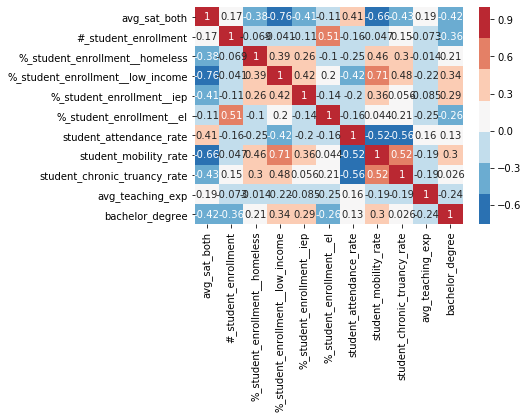

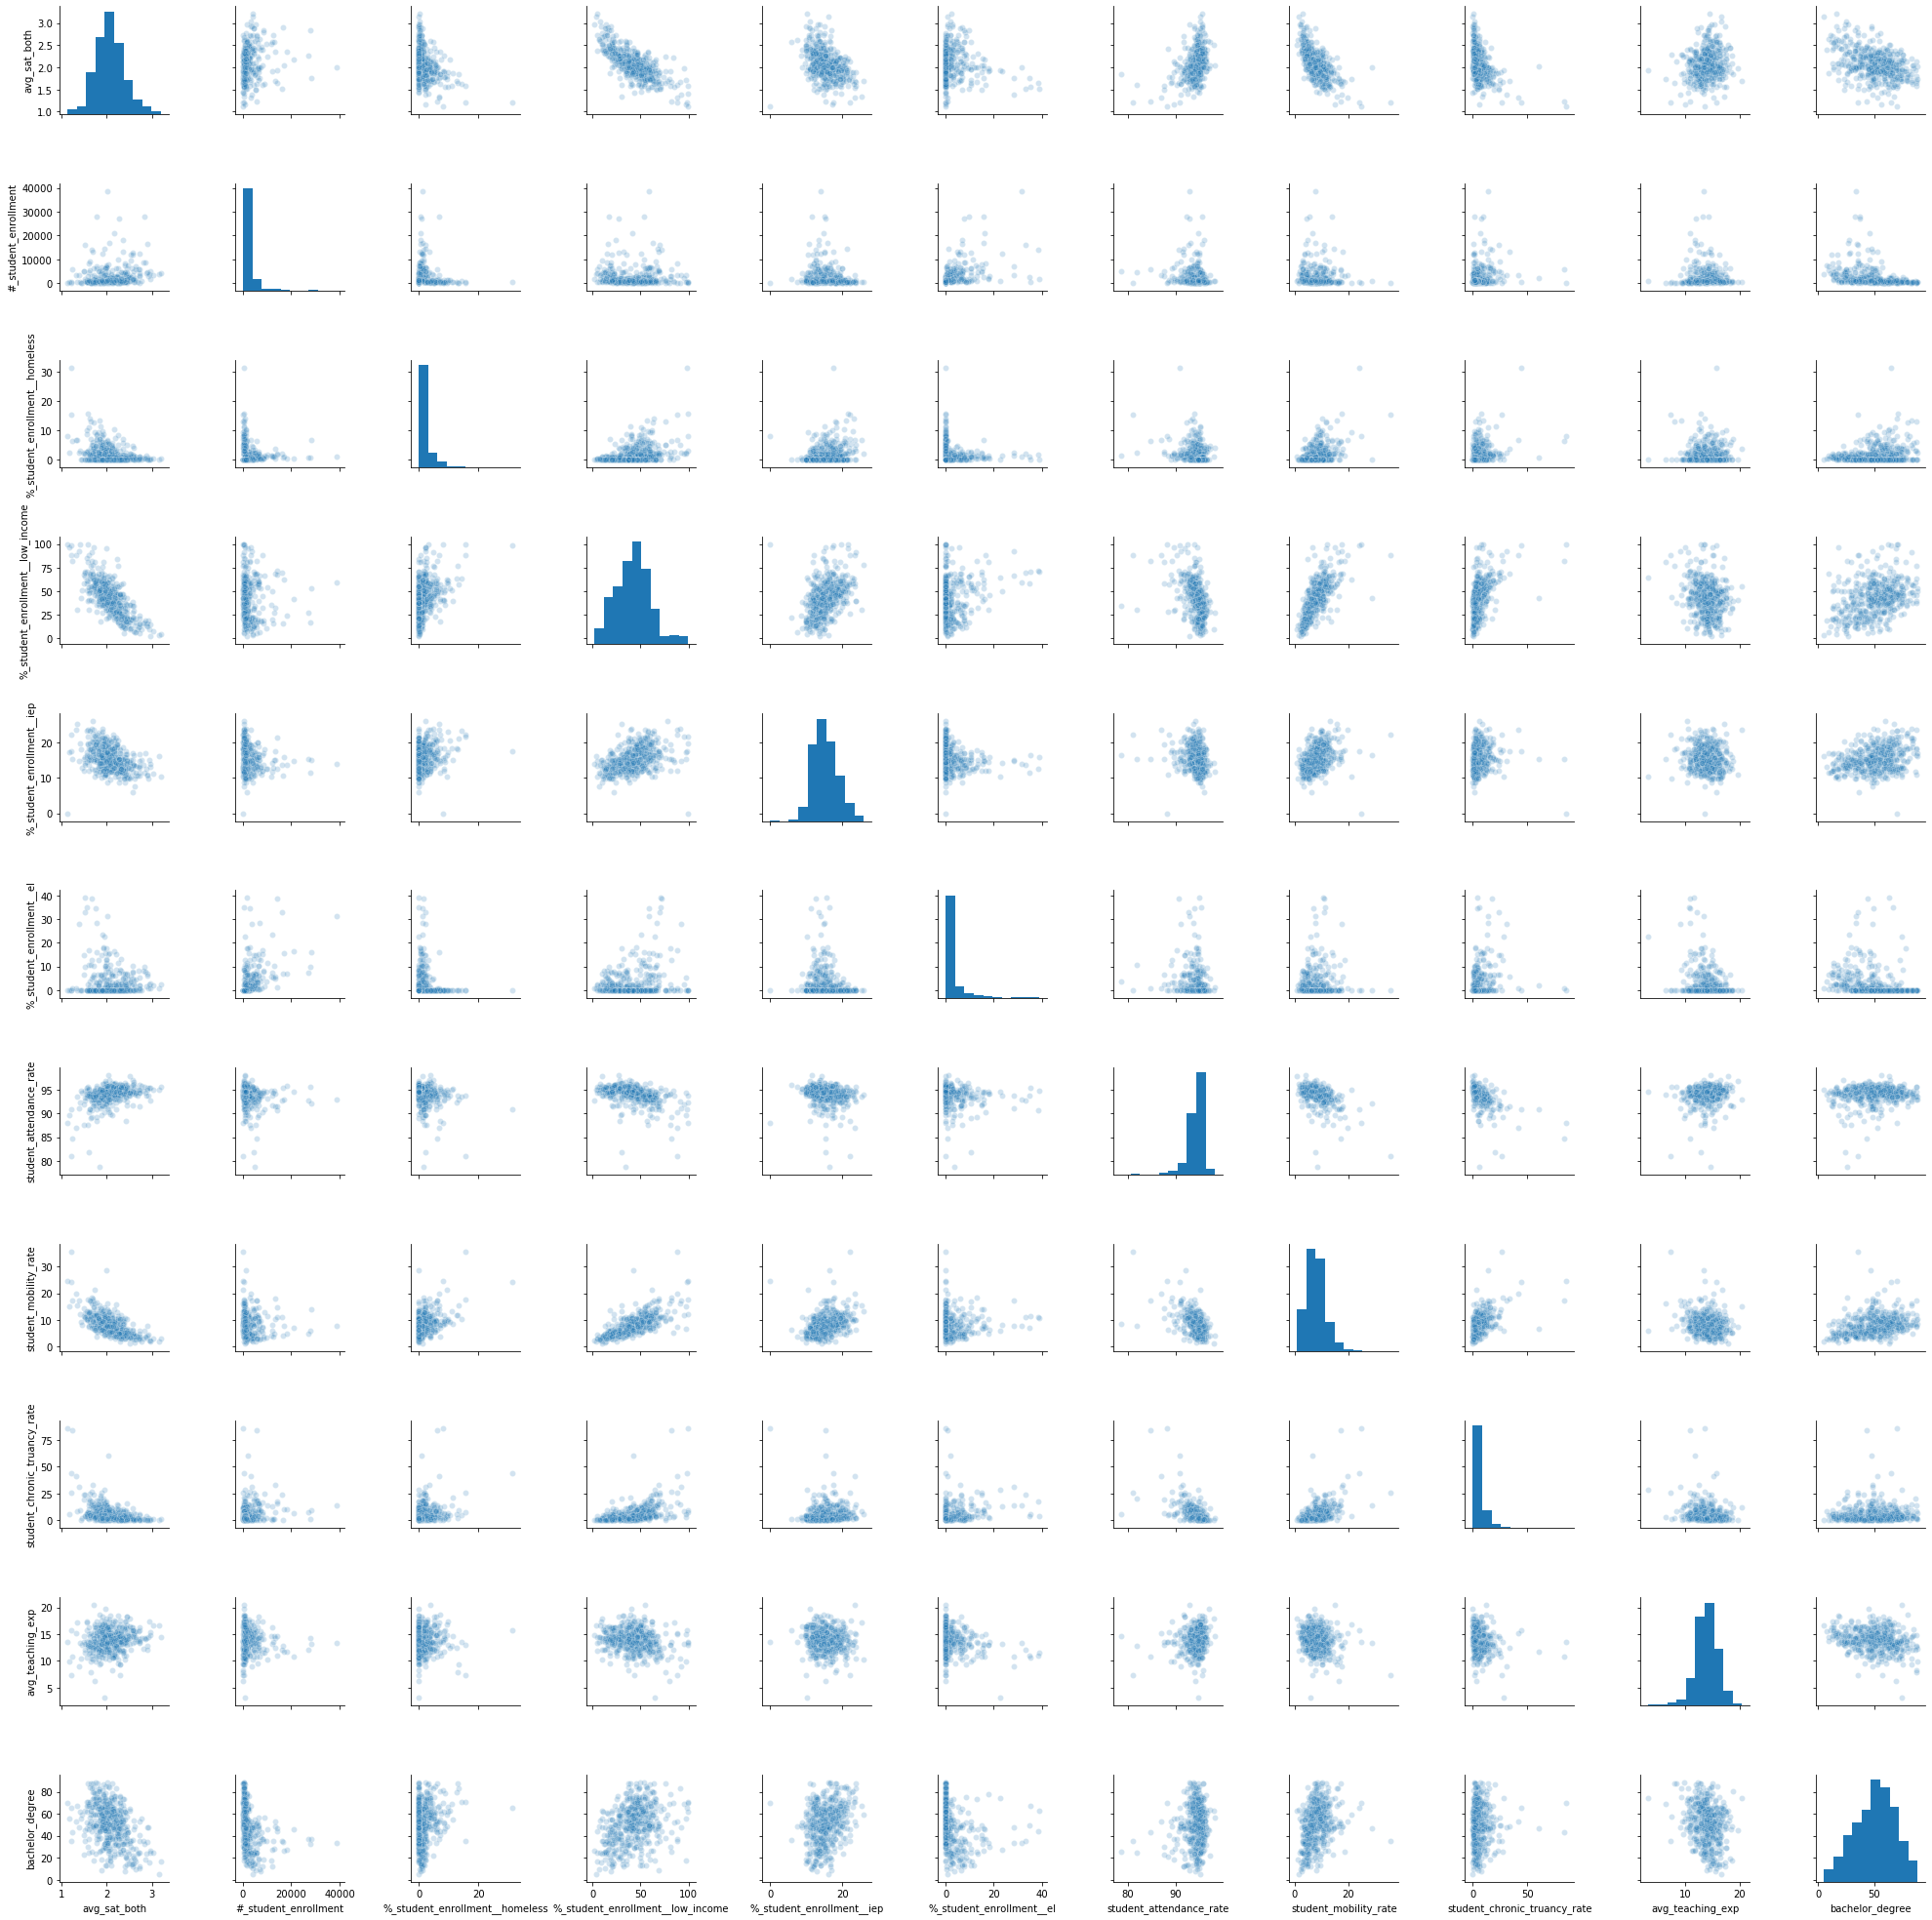

In [7]:
eda_column_subset(raw, [ind_var] + first + second)

In [8]:
# there's a school with high low-income and 0% iep (might be a mis-handled null)
# one district is major outlier in both homeless and low-income
# mobility and low_income biggest correl to worry about (.71)

# avg_teach_exp, bachelor is pretty normal => take median to fill null


avg_sat_both  #_student_enrollment  %_student_enrollment__homeless  \
count    473.000000            473.000000                      473.000000   
mean       2.072638           2308.414376                        1.854123   
std        0.324883           3911.820581                        2.970139   
min        1.125000            124.000000                        0.000000   
10%        1.683900            355.200000                        0.000000   
25%        1.872500            529.000000                        0.000000   
50%        2.047500            992.000000                        0.800000   
75%        2.269000           2221.000000                        2.400000   
90%        2.473600           5585.800000                        5.300000   
max        3.204500          38764.000000                       31.400000   

       %_student_enrollment__low_income  %_student_enrollment__iep  \
count                        473.000000                 473.000000   
mean                          42.715645                  15.317336   
std                           18.457999                   3.368913   
min                            2.100000                   0.000000   
10%                           18.000000                  11.500000   
25%                           30.000000                  12.800000   
50%                           42.600000                  15.000000   
75%                           54.100000                  17.500000   
90%                           64.380000                  20.000000   
max                           99.600000                  25.900000   

       %_student_enrollment__el  pupil_teacher_ratio__high_school  \
count                473.000000                        472.000000   
mean                   2.496617                         15.781568   
std                    5.642509                          4.479581   
min                    0.000000                          5.100000   
10%                    0.000000                          9.600000   
25%                    0.000000                         12.600000   
50%                    0.000000                         16.250000   
75%                    2.300000                         18.925000   
90%                    7.680000                         20.980000   
max                   39.000000                         33.900000   

       teacher_retention_rate  teacher_attendace_rate  inst_and_support  \
count              472.000000              468.000000        468.000000   
mean                86.705720               72.632051         75.273504   
std                  6.573358               12.425387         10.221597   
min                 56.000000                1.800000         20.900000   
10%                 78.220000               57.140000         63.010000   
25%                 83.500000               66.175000         70.300000   
50%                 88.100000               73.700000         77.200000   
75%                 91.500000               80.725000         82.200000   
90%                 93.400000               87.130000         85.800000   
max                 99.000000              100.000000         92.100000   

       %_ebf_capacity_to_meet_expectations  
count                           468.000000  
mean                             74.243376  
std                              22.175654  
min                              47.000000  
10%                              56.870000  
25%                              60.800000  
50%                              67.800000  
75%                              78.800000  
90%                             100.980000  
max                             198.000000

<Figure size 2880x2880 with 0 Axes>

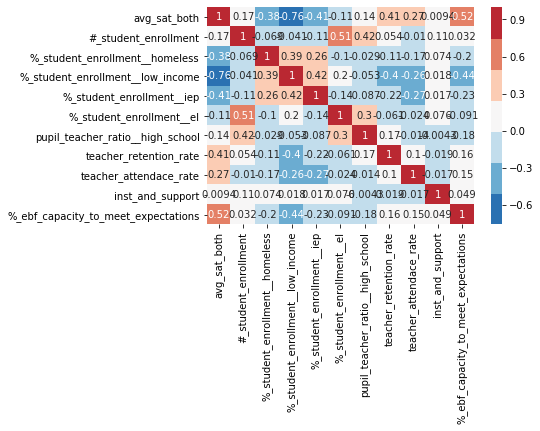

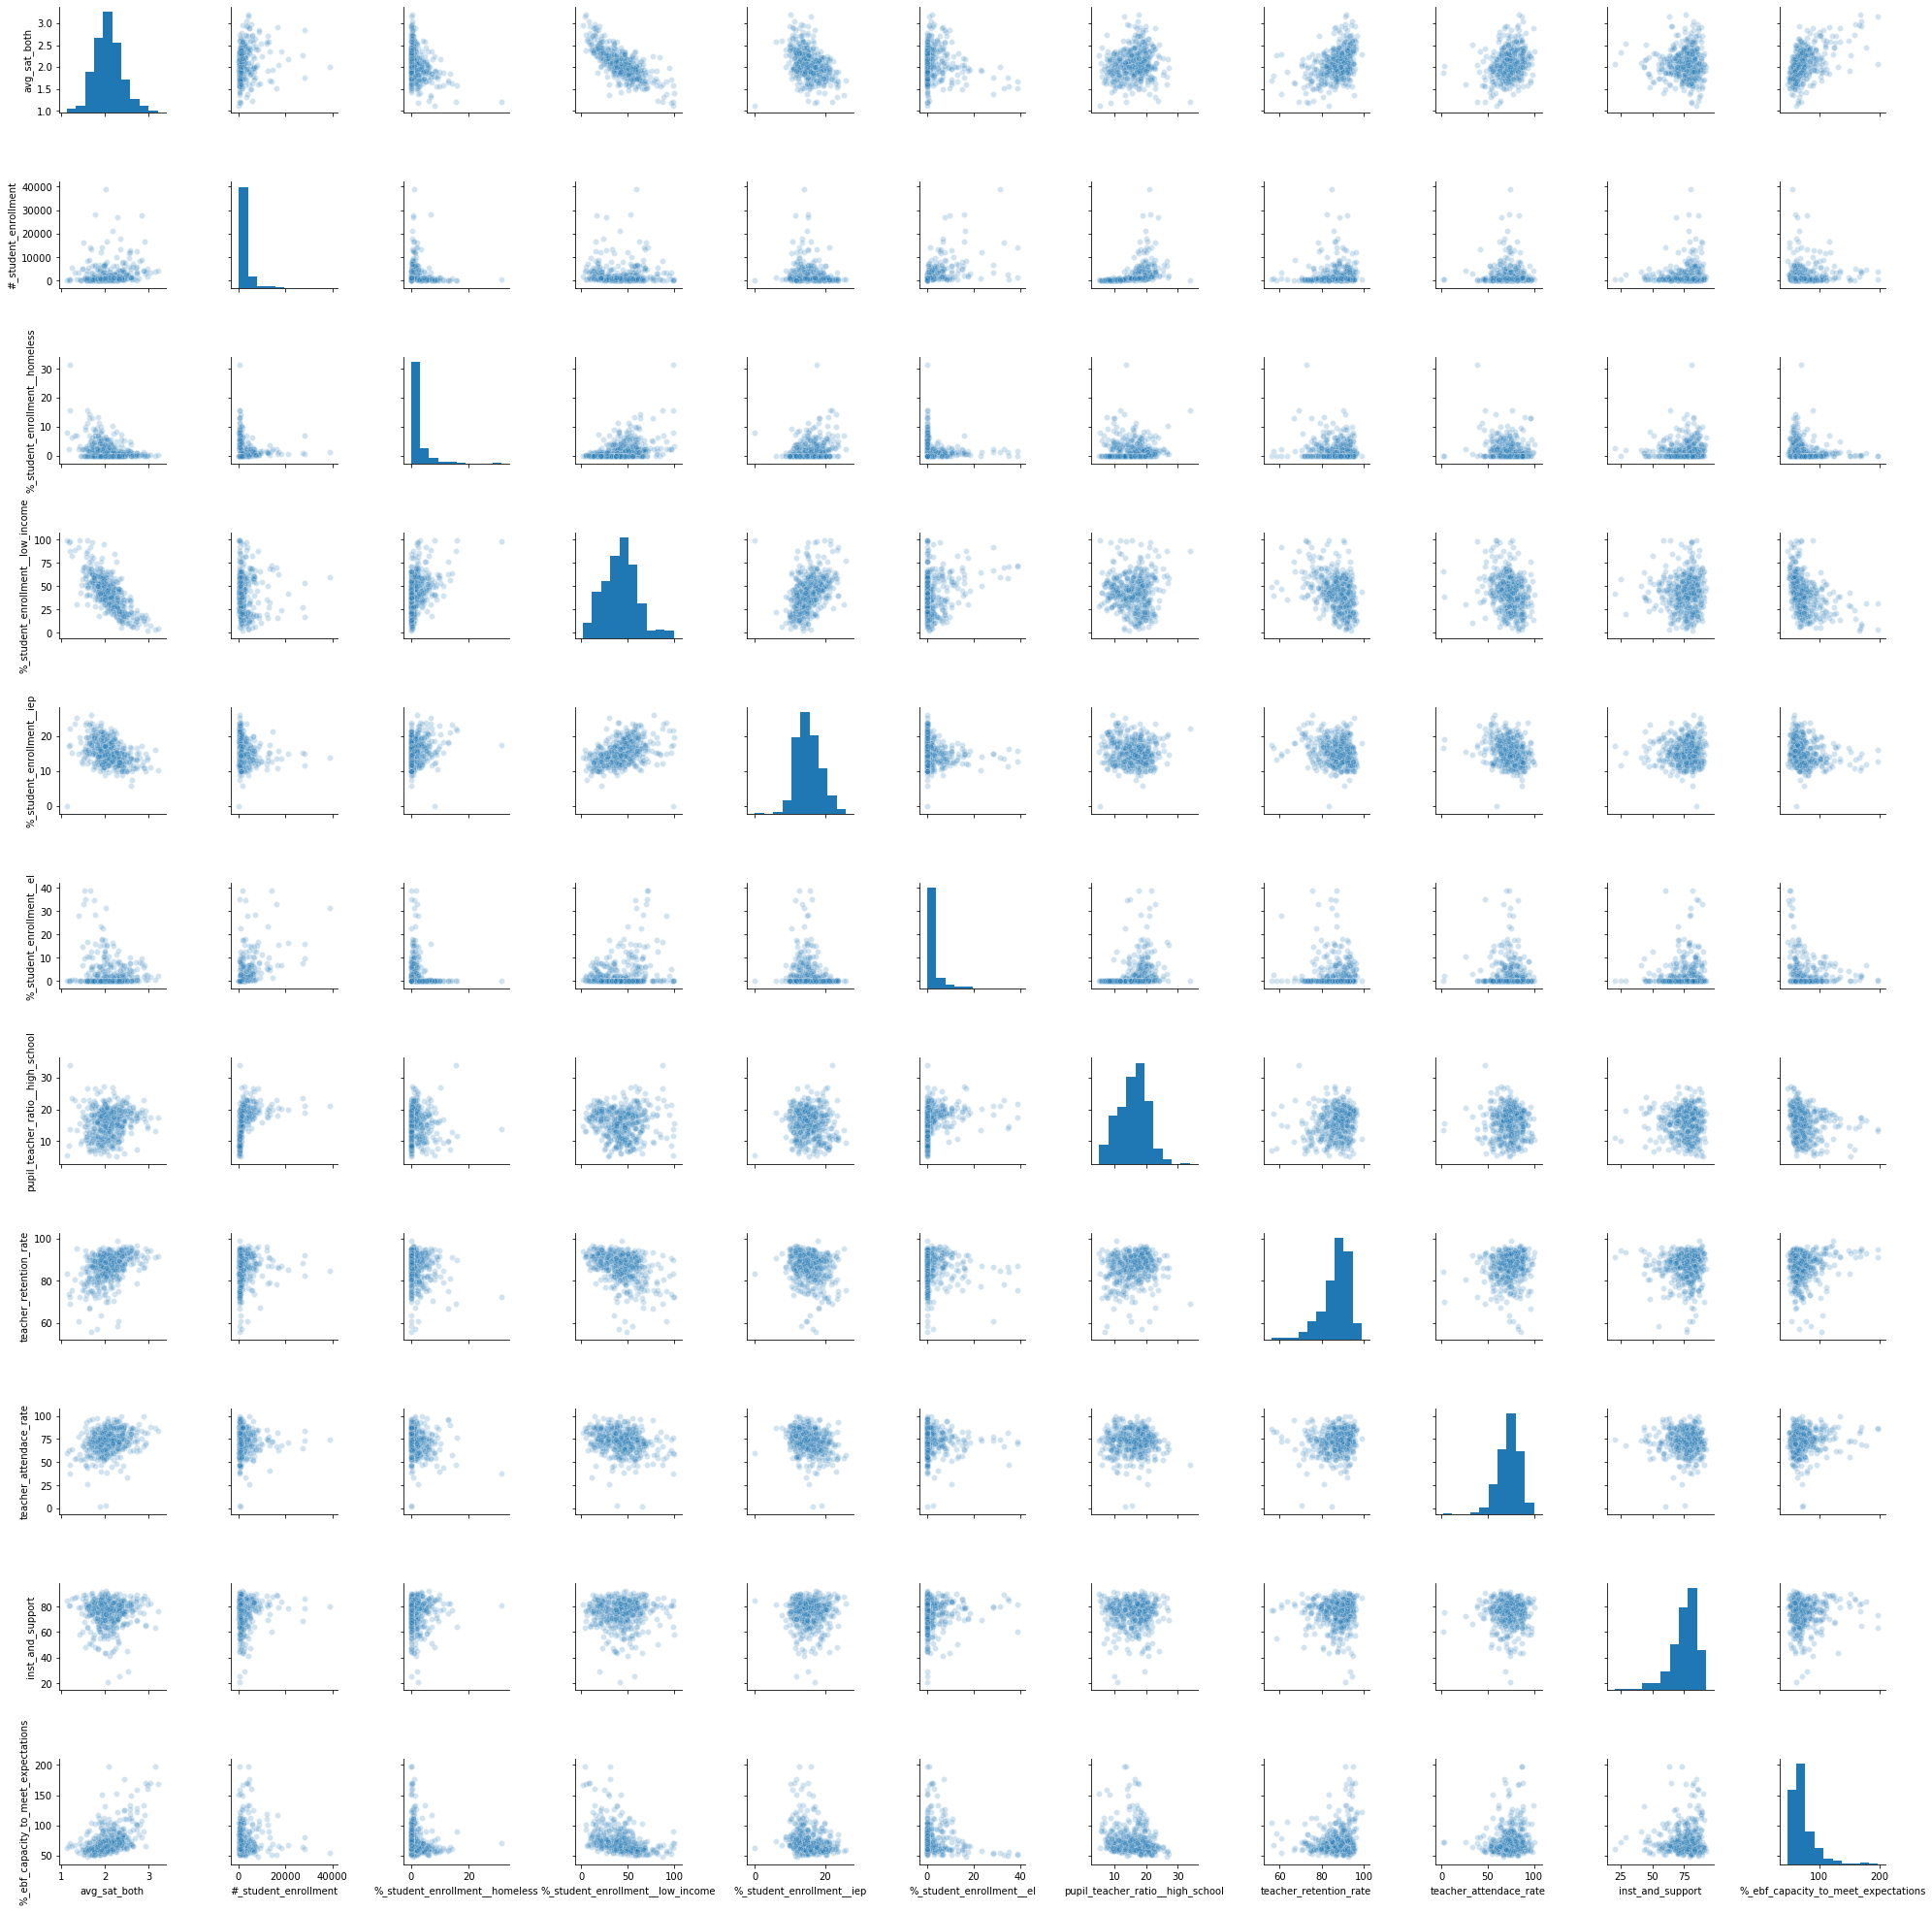

In [9]:
eda_column_subset(raw, [ind_var] + first + third)

In [10]:
# % ebf is pretty right skewed and somewhat correl with low-income
    # also, pretty strongly correl with ind var
    # makes me hesitant to impute with mean, median (perhaps drop or k-nearest neighbors)
# inst_and_support is pretty low correl so might drop that column anyway
# lots of things a little correlated with low_income
# might have heteroskedasticity btwn %ebf and sat

avg_sat_both  #_student_enrollment  %_student_enrollment__homeless  \
count    473.000000            473.000000                      473.000000   
mean       2.072638           2308.414376                        1.854123   
std        0.324883           3911.820581                        2.970139   
min        1.125000            124.000000                        0.000000   
10%        1.683900            355.200000                        0.000000   
25%        1.872500            529.000000                        0.000000   
50%        2.047500            992.000000                        0.800000   
75%        2.269000           2221.000000                        2.400000   
90%        2.473600           5585.800000                        5.300000   
max        3.204500          38764.000000                       31.400000   

       %_student_enrollment__low_income  %_student_enrollment__iep  \
count                        473.000000                 473.000000   
mean                          42.715645                  15.317336   
std                           18.457999                   3.368913   
min                            2.100000                   0.000000   
10%                           18.000000                  11.500000   
25%                           30.000000                  12.800000   
50%                           42.600000                  15.000000   
75%                           54.100000                  17.500000   
90%                           64.380000                  20.000000   
max                           99.600000                  25.900000   

       %_student_enrollment__el  avg_class_size__high_school  \
count                473.000000                   473.000000   
mean                   2.496617                    16.640592   
std                    5.642509                     4.341098   
min                    0.000000                     5.000000   
10%                    0.000000                    11.000000   
25%                    0.000000                    14.000000   
50%                    0.000000                    17.000000   
75%                    2.300000                    20.000000   
90%                    7.680000                    22.000000   
max                   39.000000                    28.000000   

       admin_avg_salary  principal_turnover_within_6_years  pupil_admin_ratio  
count        472.000000                         472.000000         472.000000  
mean       97757.144386                           1.644068         172.987076  
std        18801.927792                           0.628758          53.834771  
min        47470.670000                           0.000000          62.500000  
10%        78295.262000                           1.000000         110.020000  
25%        86191.665000                           1.000000         134.675000  
50%        95901.665000                           2.000000         172.350000  
75%       105911.262500                           2.000000         204.100000  
90%       118230.650000                           2.000000         234.390000  
max       260021.320000                           4.000000         597.000000

<Figure size 2880x2880 with 0 Axes>

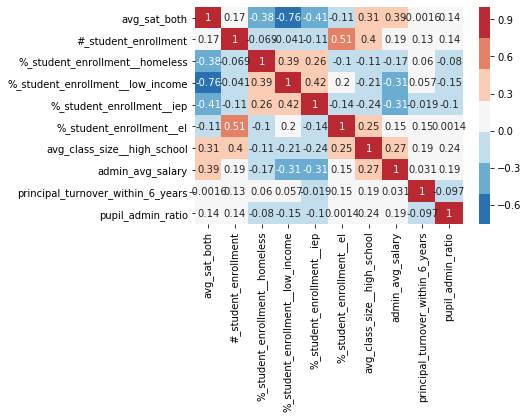

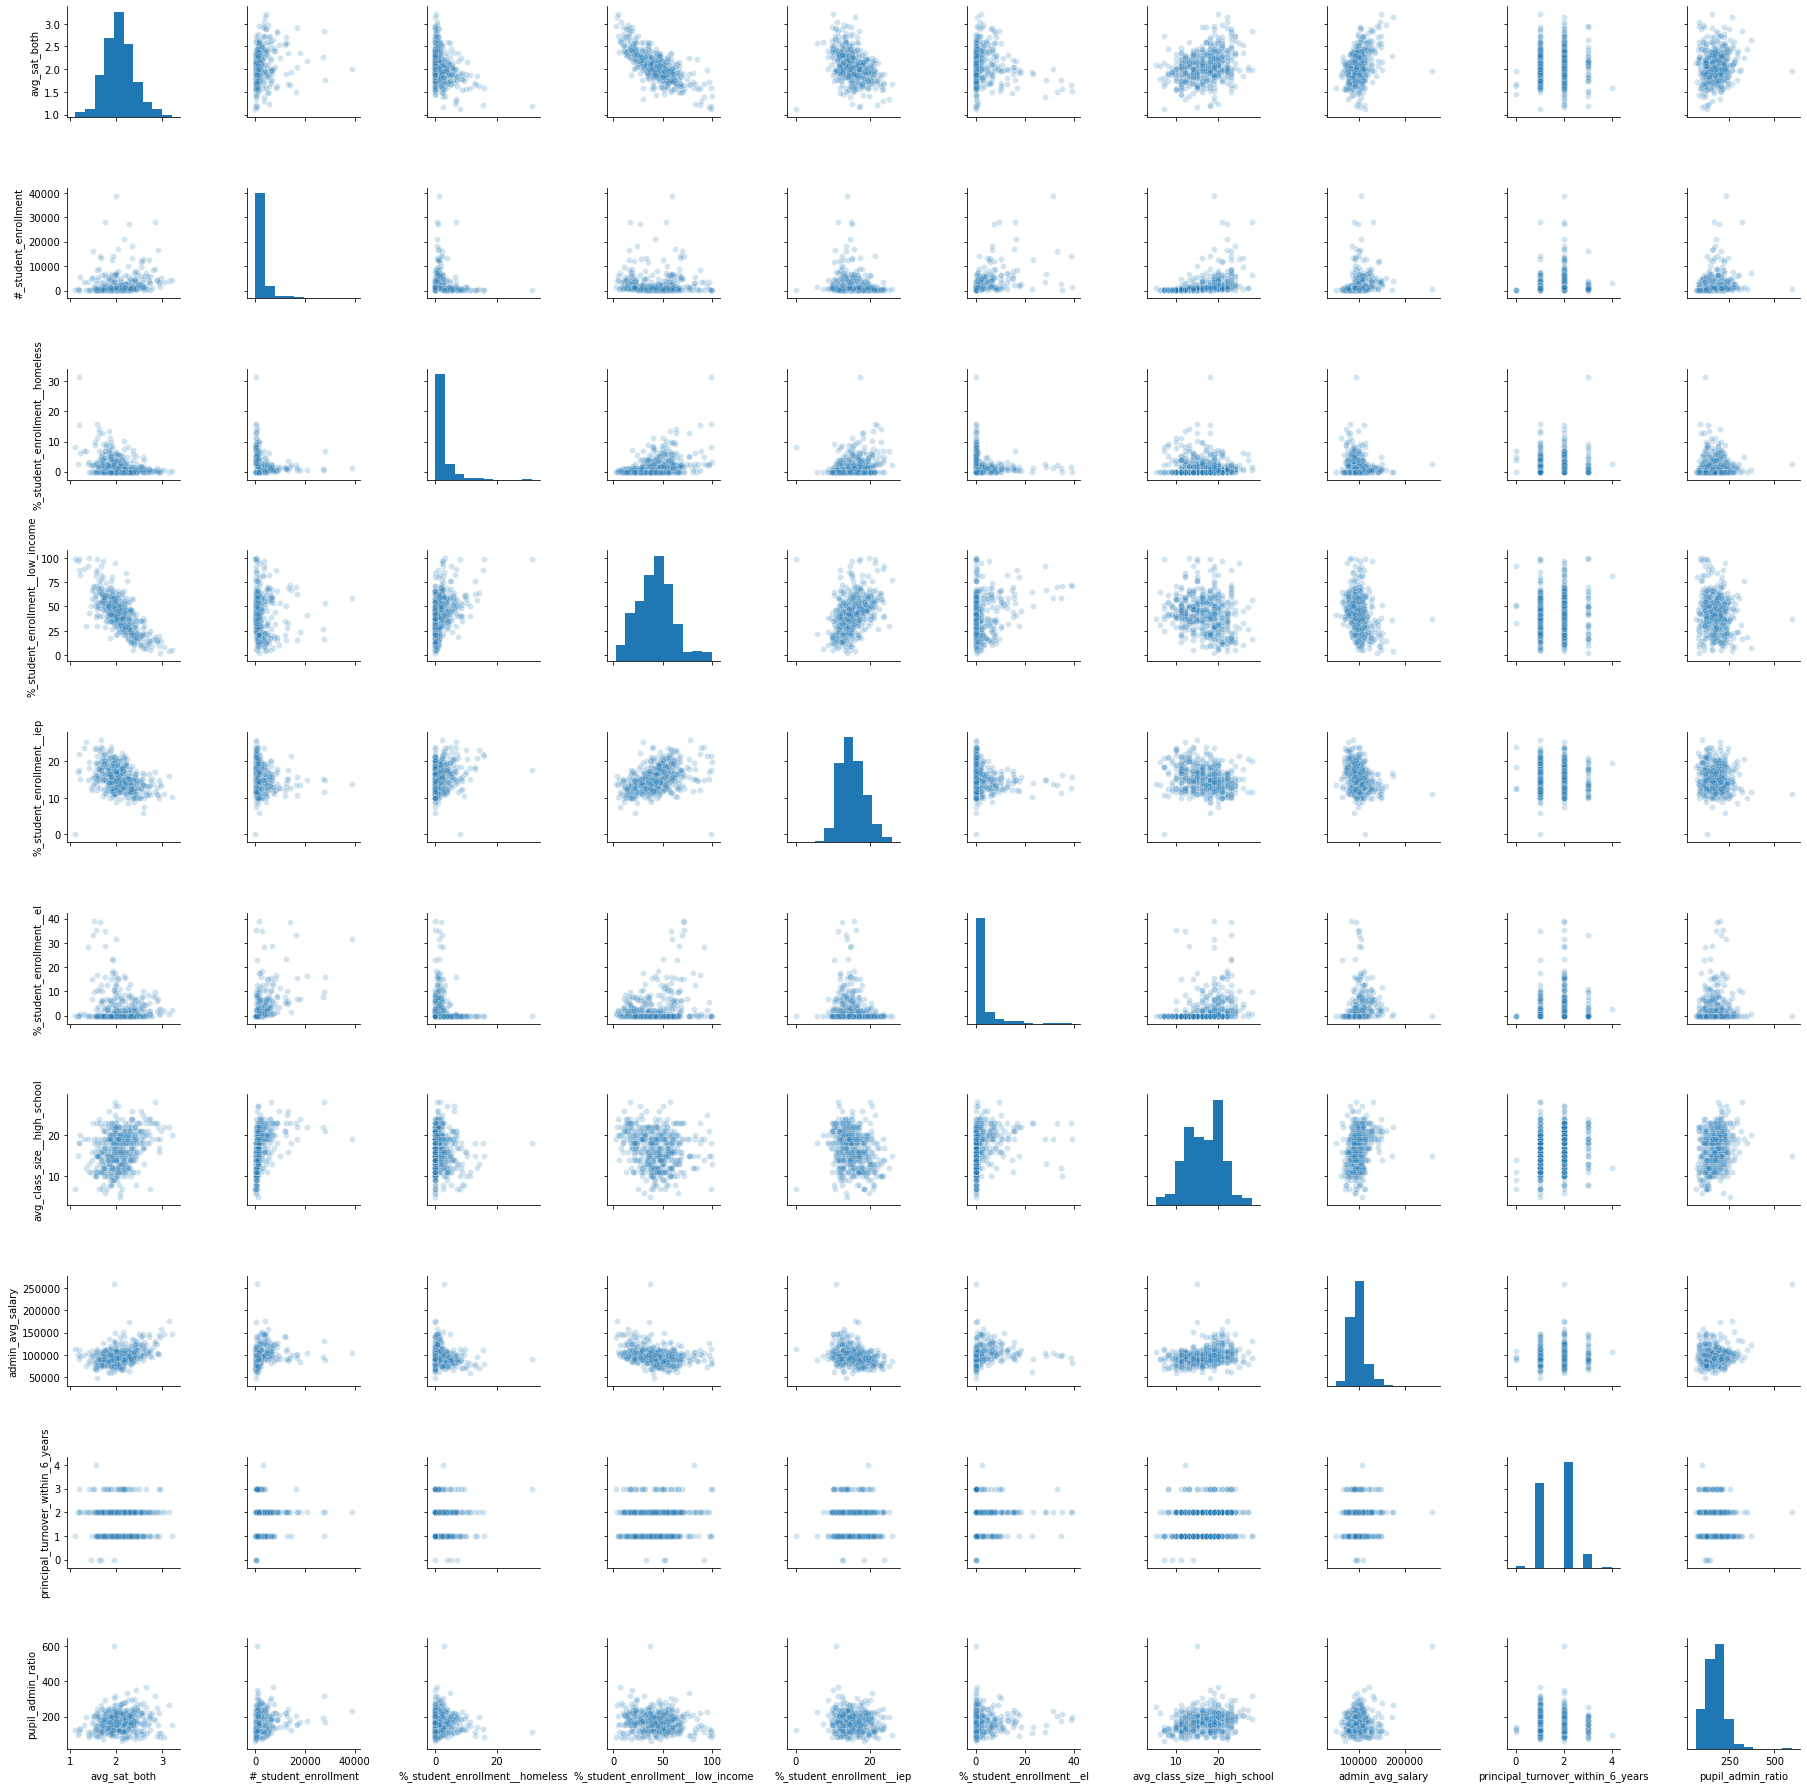

In [11]:
eda_column_subset(raw, [ind_var] + first + fourth)

In [12]:
# drop principle turnover (or perhaps polynomial it)
    # right now, low variance in metric has no rel with ind var
# major pupil-admin / avg-admin-sal outlier
# no correlations to really worry about

avg_sat_both  student_attendance_rate  student_mobility_rate  \
count    473.000000               473.000000             473.000000   
mean       2.072638                94.073150               8.149260   
std        0.324883                 1.936223               3.886445   
min        1.125000                78.700000               1.000000   
10%        1.683900                92.300000               3.900000   
25%        1.872500                93.600000               5.500000   
50%        2.047500                94.500000               7.800000   
75%        2.269000                95.100000              10.200000   
90%        2.473600                95.700000              12.480000   
max        3.204500                98.200000              35.700000   

       student_chronic_truancy_rate  avg_teaching_exp  bachelor_degree  \
count                    473.000000        472.000000       472.000000   
mean                       5.994503         13.890890        50.480720   
std                        8.286379          2.053411        18.002051   
min                        0.000000          3.200000         5.200000   
10%                        0.800000         11.410000        24.720000   
25%                        1.600000         12.800000        37.775000   
50%                        3.500000         13.900000        51.500000   
75%                        7.400000         15.100000        63.325000   
90%                       13.080000         16.400000        73.090000   
max                       85.800000         20.400000        88.900000   

       pupil_teacher_ratio__high_school  teacher_retention_rate  \
count                        472.000000              472.000000   
mean                          15.781568               86.705720   
std                            4.479581                6.573358   
min                            5.100000               56.000000   
10%                            9.600000               78.220000   
25%                           12.600000               83.500000   
50%                           16.250000               88.100000   
75%                           18.925000               91.500000   
90%                           20.980000               93.400000   
max                           33.900000               99.000000   

       teacher_attendace_rate  inst_and_support  \
count              468.000000        468.000000   
mean                72.632051         75.273504   
std                 12.425387         10.221597   
min                  1.800000         20.900000   
10%                 57.140000         63.010000   
25%                 66.175000         70.300000   
50%                 73.700000         77.200000   
75%                 80.725000         82.200000   
90%                 87.130000         85.800000   
max                100.000000         92.100000   

       %_ebf_capacity_to_meet_expectations  
count                           468.000000  
mean                             74.243376  
std                              22.175654  
min                              47.000000  
10%                              56.870000  
25%                              60.800000  
50%                              67.800000  
75%                              78.800000  
90%                             100.980000  
max                             198.000000

<Figure size 2880x2880 with 0 Axes>

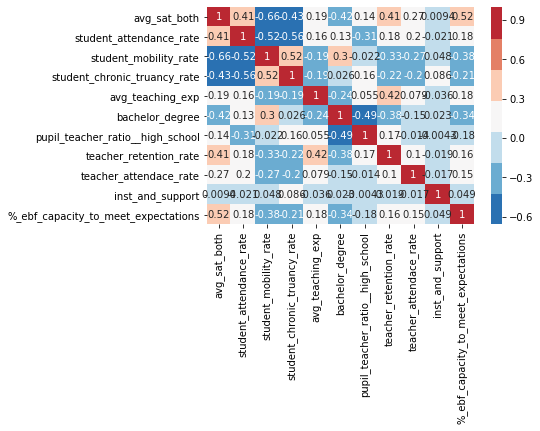

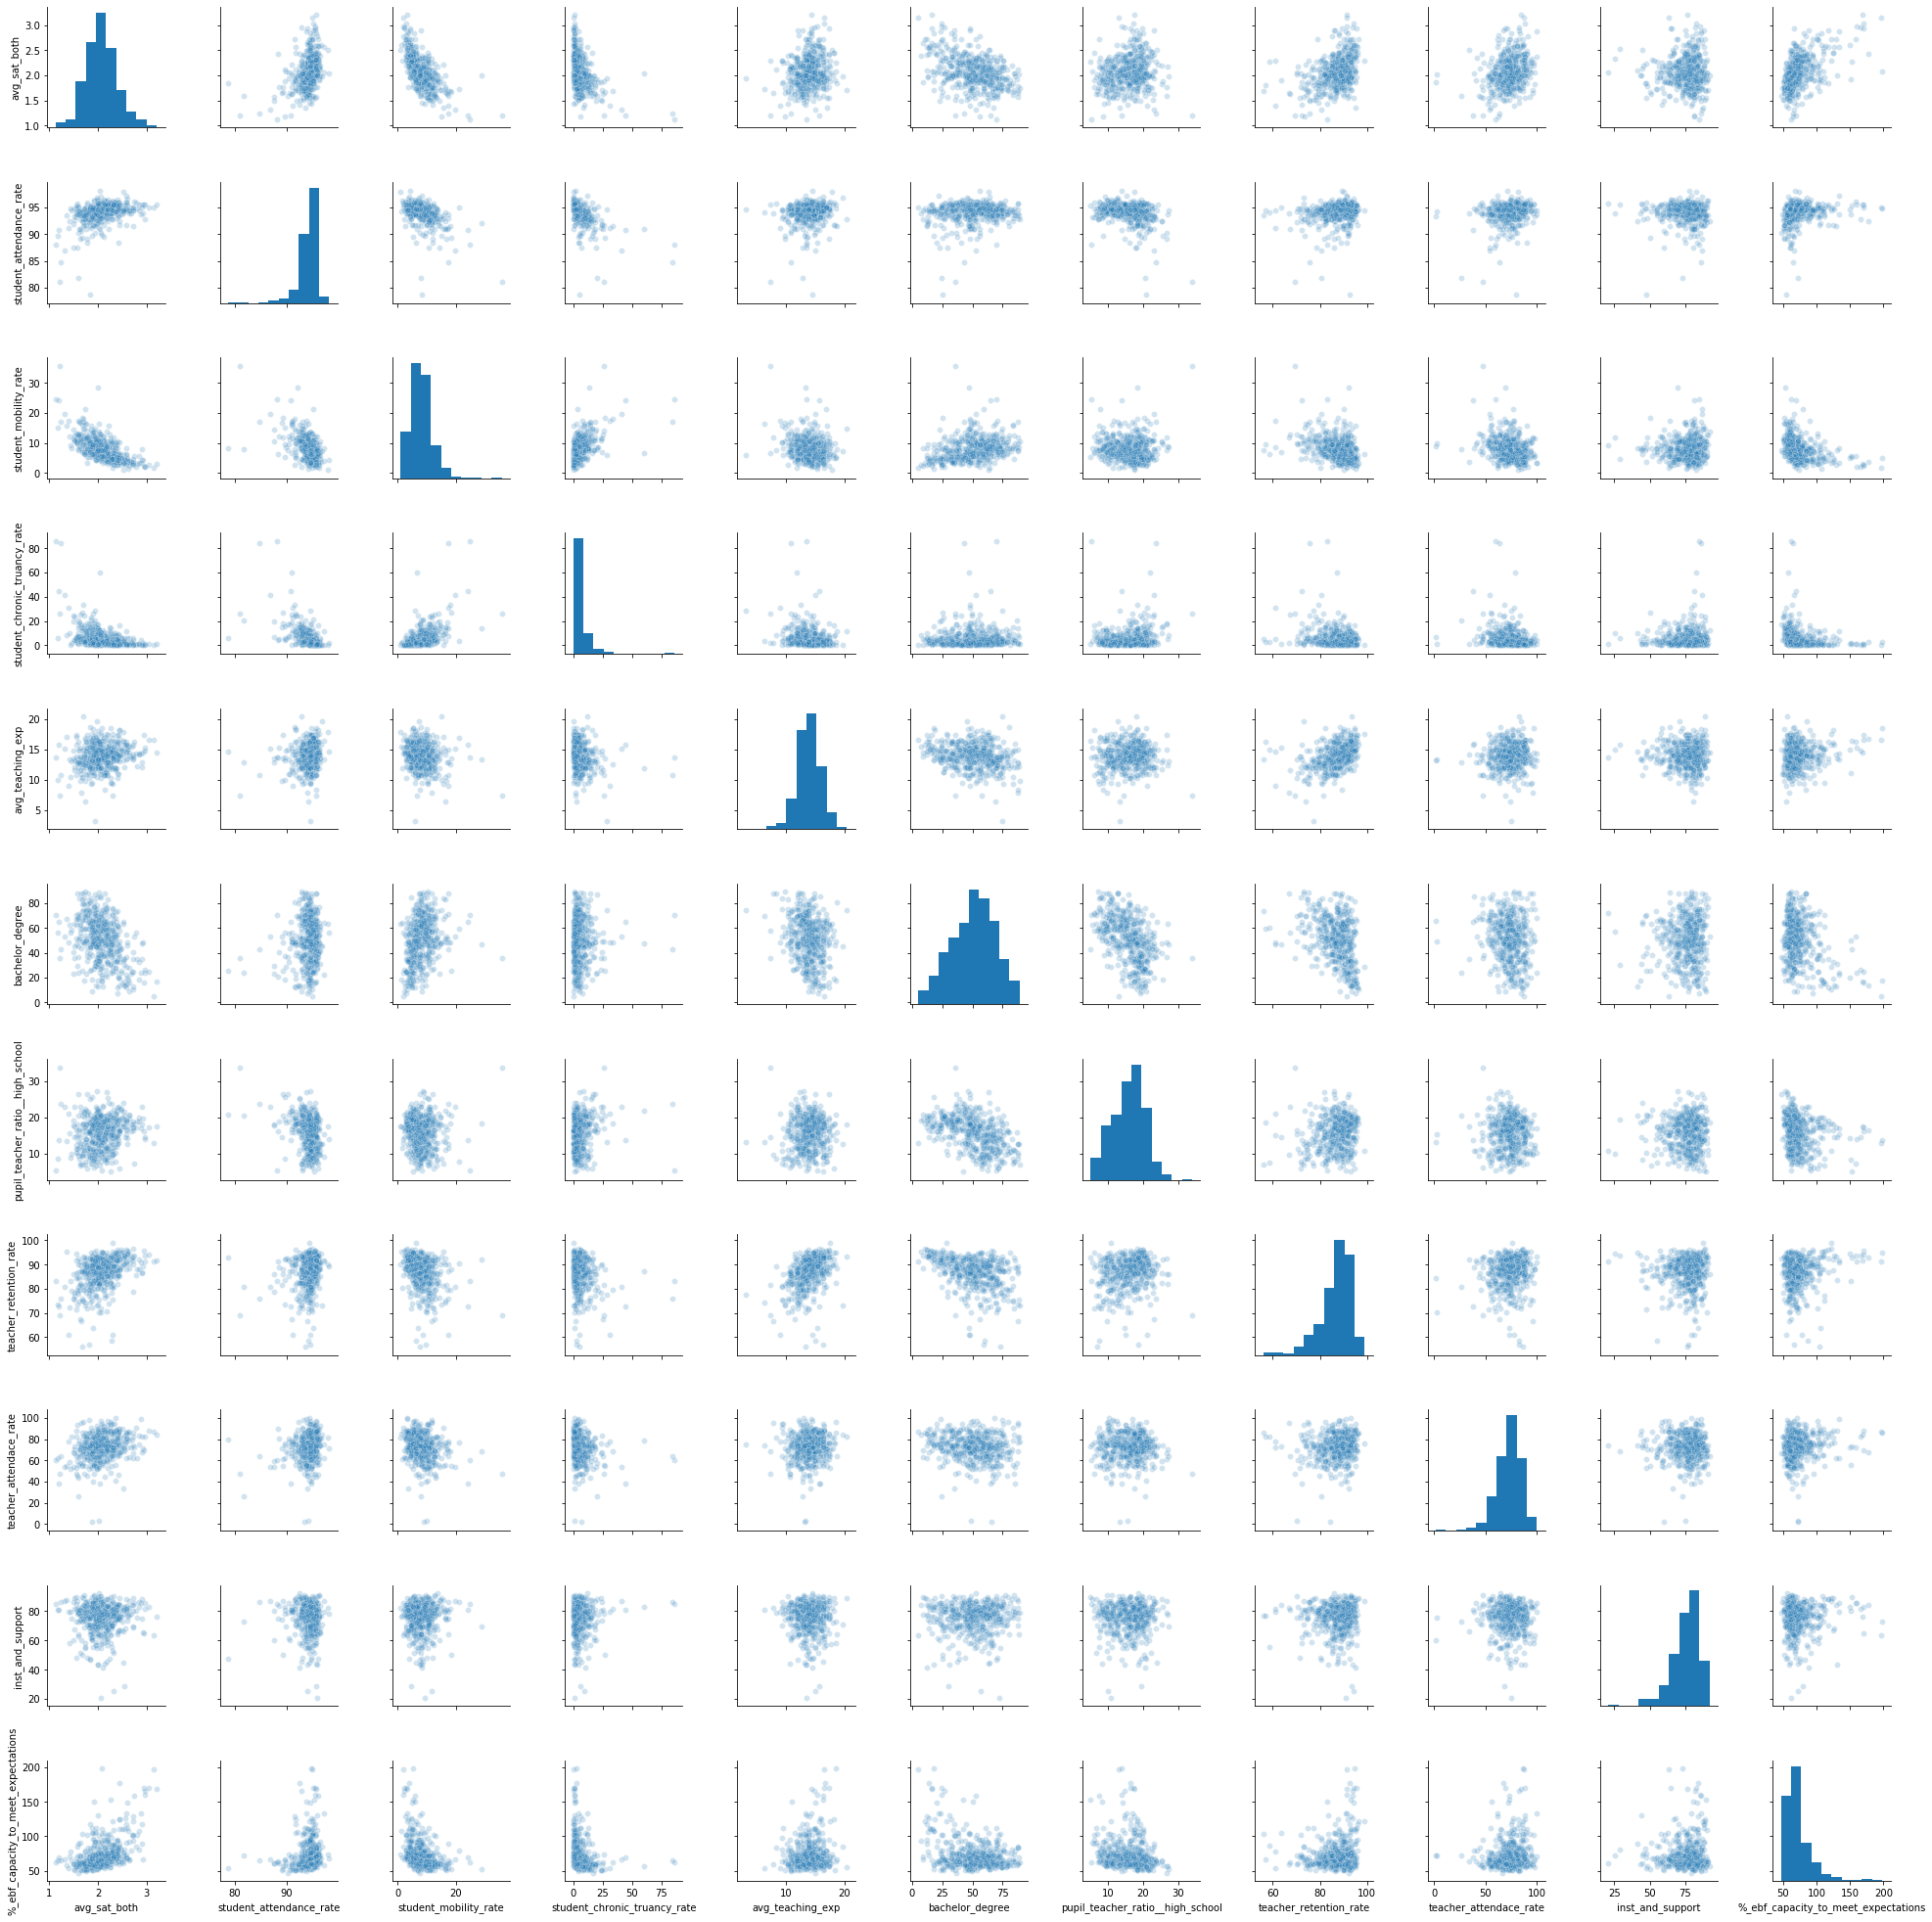

In [13]:
eda_column_subset(raw, [ind_var] + second + third)

In [14]:
# two teacher attendence values below 20% (almost 0) -> gotta be wrong
# might be a curve btwn sat and mobility

avg_sat_both  student_attendance_rate  student_mobility_rate  \
count    473.000000               473.000000             473.000000   
mean       2.072638                94.073150               8.149260   
std        0.324883                 1.936223               3.886445   
min        1.125000                78.700000               1.000000   
10%        1.683900                92.300000               3.900000   
25%        1.872500                93.600000               5.500000   
50%        2.047500                94.500000               7.800000   
75%        2.269000                95.100000              10.200000   
90%        2.473600                95.700000              12.480000   
max        3.204500                98.200000              35.700000   

       student_chronic_truancy_rate  avg_teaching_exp  bachelor_degree  \
count                    473.000000        472.000000       472.000000   
mean                       5.994503         13.890890        50.480720   
std                        8.286379          2.053411        18.002051   
min                        0.000000          3.200000         5.200000   
10%                        0.800000         11.410000        24.720000   
25%                        1.600000         12.800000        37.775000   
50%                        3.500000         13.900000        51.500000   
75%                        7.400000         15.100000        63.325000   
90%                       13.080000         16.400000        73.090000   
max                       85.800000         20.400000        88.900000   

       avg_class_size__high_school  admin_avg_salary  \
count                   473.000000        472.000000   
mean                     16.640592      97757.144386   
std                       4.341098      18801.927792   
min                       5.000000      47470.670000   
10%                      11.000000      78295.262000   
25%                      14.000000      86191.665000   
50%                      17.000000      95901.665000   
75%                      20.000000     105911.262500   
90%                      22.000000     118230.650000   
max                      28.000000     260021.320000   

       principal_turnover_within_6_years  pupil_admin_ratio  
count                         472.000000         472.000000  
mean                            1.644068         172.987076  
std                             0.628758          53.834771  
min                             0.000000          62.500000  
10%                             1.000000         110.020000  
25%                             1.000000         134.675000  
50%                             2.000000         172.350000  
75%                             2.000000         204.100000  
90%                             2.000000         234.390000  
max                             4.000000         597.000000

<Figure size 2880x2880 with 0 Axes>

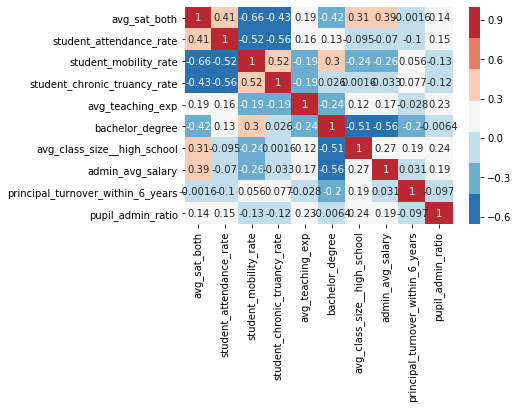

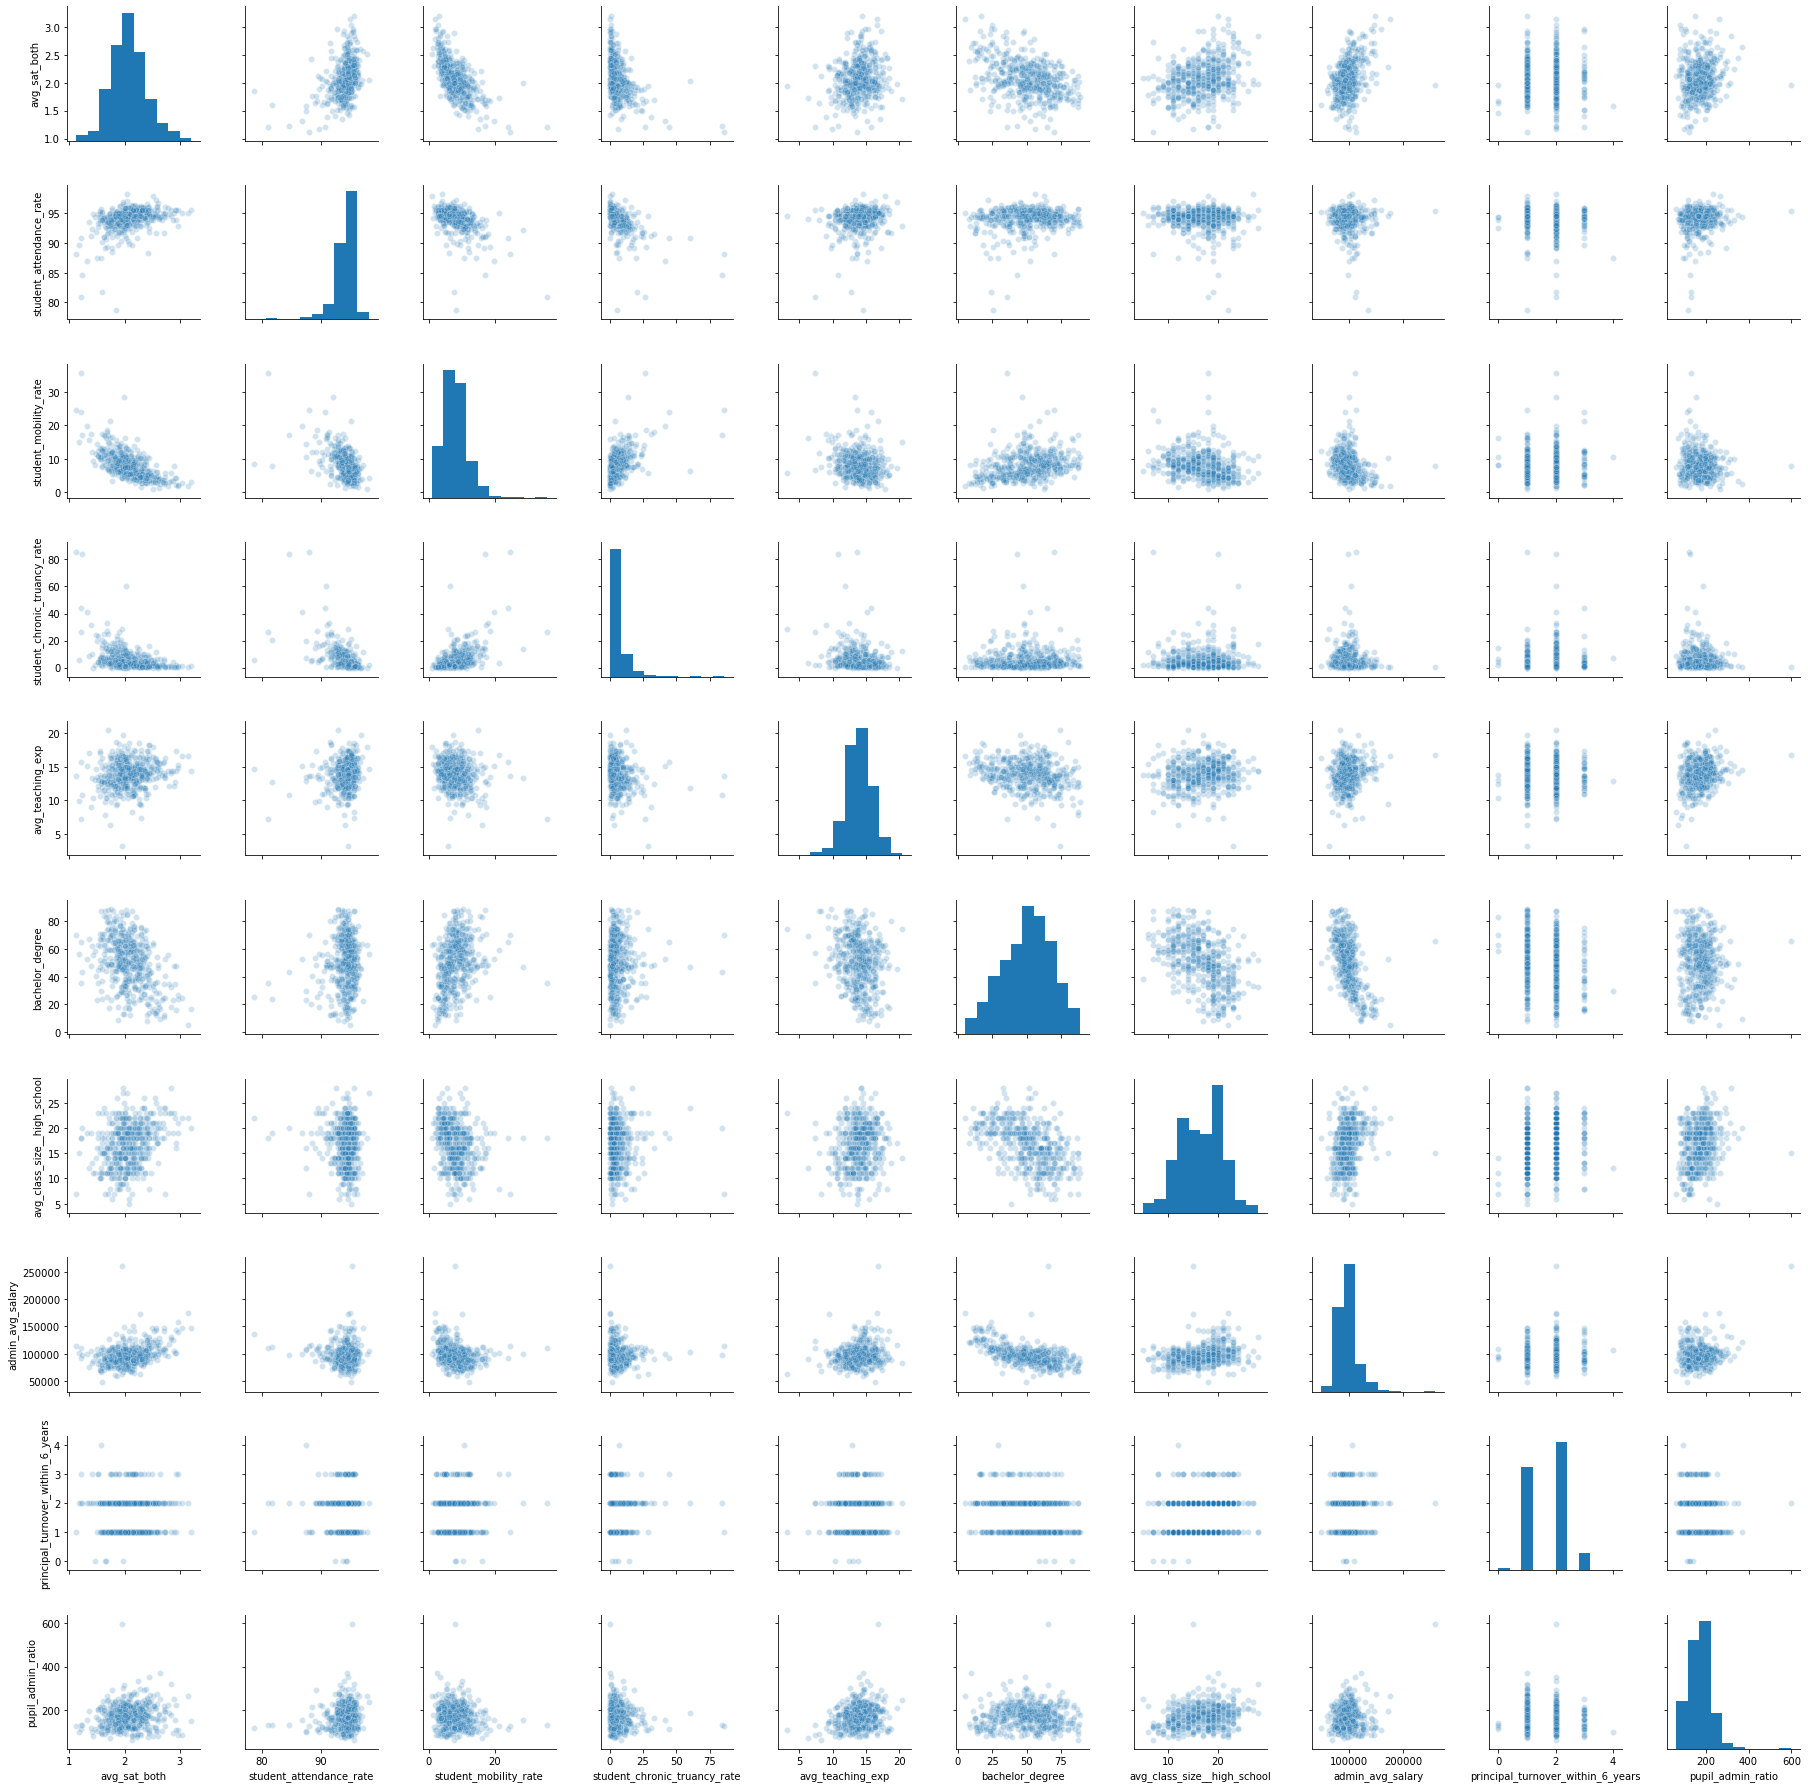

In [15]:
eda_column_subset(raw, [ind_var] + second + fourth)

In [16]:
# nothing looks crazy

avg_sat_both  pupil_teacher_ratio__high_school  teacher_retention_rate  \
count    473.000000                        472.000000              472.000000   
mean       2.072638                         15.781568               86.705720   
std        0.324883                          4.479581                6.573358   
min        1.125000                          5.100000               56.000000   
10%        1.683900                          9.600000               78.220000   
25%        1.872500                         12.600000               83.500000   
50%        2.047500                         16.250000               88.100000   
75%        2.269000                         18.925000               91.500000   
90%        2.473600                         20.980000               93.400000   
max        3.204500                         33.900000               99.000000   

       teacher_attendace_rate  inst_and_support  \
count              468.000000        468.000000   
mean                72.632051         75.273504   
std                 12.425387         10.221597   
min                  1.800000         20.900000   
10%                 57.140000         63.010000   
25%                 66.175000         70.300000   
50%                 73.700000         77.200000   
75%                 80.725000         82.200000   
90%                 87.130000         85.800000   
max                100.000000         92.100000   

       %_ebf_capacity_to_meet_expectations  avg_class_size__high_school  \
count                           468.000000                   473.000000   
mean                             74.243376                    16.640592   
std                              22.175654                     4.341098   
min                              47.000000                     5.000000   
10%                              56.870000                    11.000000   
25%                              60.800000                    14.000000   
50%                              67.800000                    17.000000   
75%                              78.800000                    20.000000   
90%                             100.980000                    22.000000   
max                             198.000000                    28.000000   

       admin_avg_salary  principal_turnover_within_6_years  pupil_admin_ratio  
count        472.000000                         472.000000         472.000000  
mean       97757.144386                           1.644068         172.987076  
std        18801.927792                           0.628758          53.834771  
min        47470.670000                           0.000000          62.500000  
10%        78295.262000                           1.000000         110.020000  
25%        86191.665000                           1.000000         134.675000  
50%        95901.665000                           2.000000         172.350000  
75%       105911.262500                           2.000000         204.100000  
90%       118230.650000                           2.000000         234.390000  
max       260021.320000                           4.000000         597.000000

<Figure size 2880x2880 with 0 Axes>

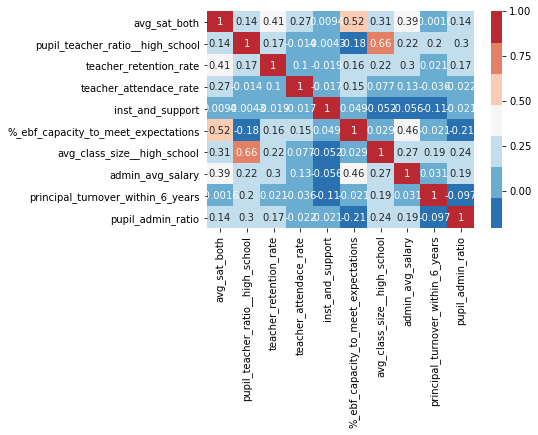

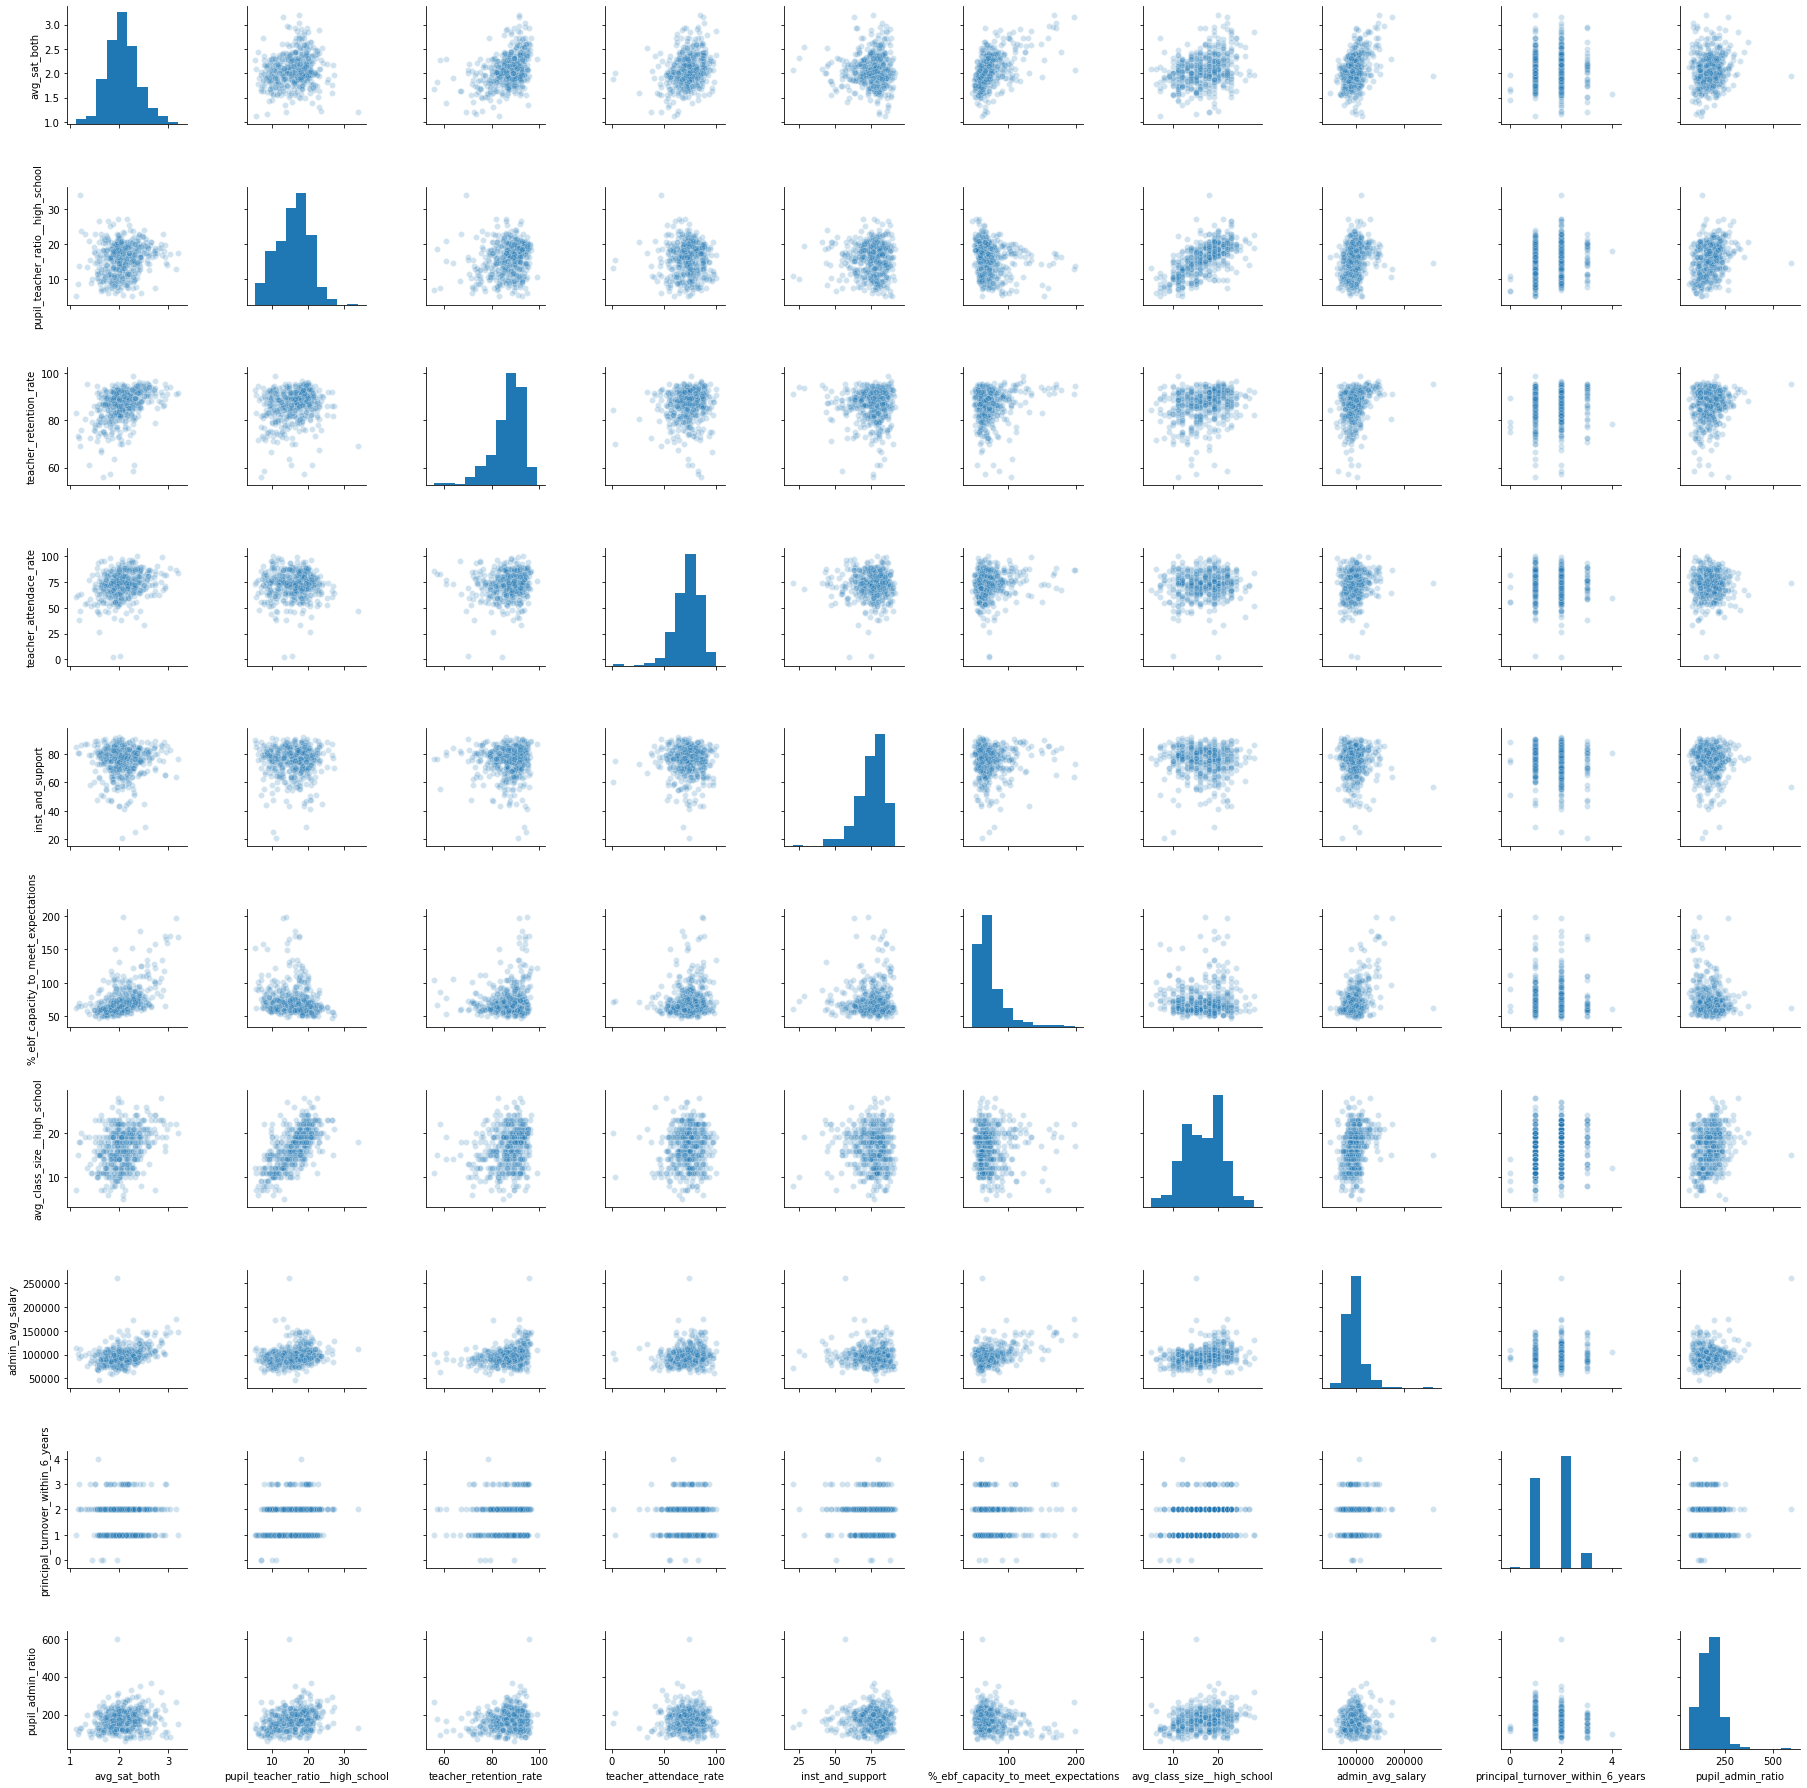

In [17]:
eda_column_subset(raw, [ind_var] + third + fourth)

In [18]:
# probably pick one of pupil-teacher vs avg-class-size (class size better)

In [19]:
# CONCLUSIONS

# How to handle nulls:
    # Drop Column:
        # principle_turnover (low var, low corr with sat)
        # inst_support (low corr with sat, corr with other stuff)
        # pupil_teacher_ratio (prefer avg clas size)
        # district_type (domain knowledge -> unlikely to matter)
    # mean:
        # avg_teach_exp (norm dist, low corr with other var)
        # pupil_admin_ratio (norm dist, low corr with other var)
    # mean or k-nearest:
        # bachelor_deg
        # teacher_retention
        # teacher_attendence
        # admin_salary 
            # might just use mean for first pass
    # k-nearest:
        # %ebf (highly corr with low_inc, h corr with sat)
            # might just drop for first pass
        
# Outliers:
    # Homeless/Low Income District -> drop
    # High Sal / Few Staff District -> drop
    # Teacher attendence near zero -> correct to mean/k-nearest
    
# Feature Engineering:
    # Might be poly relationship btwn mobility and sat
    
# Incorrect Null Handling
    # I think there are some suspect 0 values for "%_student" vals (TD)

# Data Cleaning

In [703]:
for_model = clean_data(raw)

In [704]:
for_model.head()

avg_sat_both  num_student_enrollment  perc_student_enrollment__homeless  \
0        2.1735                   559.0                                0.0   
1        2.0865                   602.0                                0.0   
2        2.0270                   874.0                                0.0   
3        2.1525                   674.0                                0.0   
4        1.9970                  6469.0                                1.0   

   perc_student_enrollment__low_income  perc_student_enrollment__iep  \
0                                 48.8                          17.9   
1                                 24.9                          15.3   
2                                 46.7                          18.6   
3                                 20.2                          17.2   
4                                 60.7                          18.7   

   perc_student_enrollment__el  student_attendance_rate  \
0                          0.0                     95.6   
1                          0.0                     95.6   
2                          0.0                     94.8   
3                          0.0                     94.9   
4                          0.3                     92.8   

   student_mobility_rate  student_chronic_truancy_rate  avg_teaching_exp  \
0                    4.5                           4.0              11.5   
1                    3.3                           0.9              13.5   
2                    5.9                           3.3              12.5   
3                    5.7                           2.1              14.1   
4                   10.9                          13.7              12.0   

   bachelor_degree  teacher_retention_rate  teacher_attendace_rate  \
0             56.3                    92.9                    63.8   
1             41.9                    91.5                    57.7   
2             42.9                    81.3                    81.0   
3             61.3                    89.7                    77.6   
4             56.9                    73.6                    78.7   

   perc_ebf_capacity_to_meet_expectations  avg_class_size__high_school  \
0                                    59.4                         13.0   
1                                    66.7                         22.0   
2                                    62.3                         15.0   
3                                    68.1                         11.0   
4                                    69.8                         20.0   

   admin_avg_salary  pupil_admin_ratio  
0          72141.72              139.8  
1          83605.24              200.7  
2          75068.50              145.7  
3          83692.00              134.8  
4          82764.57              205.4

# Model

In [522]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, lars_path
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.regression.linear_model import RegressionResults
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler

## Split Into Train and Test

In [531]:
X, y = for_model.drop(columns=[ind_var]), for_model[ind_var]

In [707]:
rand_state = find_consistent_train_test_split(X, y, test_size=.2, display_top_ten=True)

[(74, 0.0434539950933246), (60, 0.05670532201835541), (95, 0.06143735949243732), (88, 0.08178120996371573), (10, 0.08254142637142332), (17, 0.08964919519599471), (3, 0.09638745395191364), (37, 0.09647023055958107), (65, 0.09769575833550286), (85, 0.09861753462629984)]


In [708]:
# TD - use rand_state var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [714]:
validate_train_test_split(X_train, X_test, y_train, y_test)

***** Diff Btwn Mean of Train vs. Test (in std) *****
***** Features *****
num_student_enrollment: 0.04168131942447788
perc_student_enrollment__homeless: 0.09776675649410281
perc_student_enrollment__low_income: -0.022916141703407118
perc_student_enrollment__iep: 0.018880065558139637
perc_student_enrollment__el: 0.049902298430179265
student_attendance_rate: -0.05827788615788754
student_mobility_rate: 0.04378249414119909
student_chronic_truancy_rate: -0.005959406975855162
avg_teaching_exp: -0.09360584512346505
bachelor_degree: 0.007784920062254022
teacher_retention_rate: 0.01290461711271343
teacher_attendace_rate: 0.040205967504062114
perc_ebf_capacity_to_meet_expectations: 0.012030232976994902
avg_class_size__high_school: -0.02670284179569764
admin_avg_salary: 0.056322054524656794
pupil_admin_ratio: -0.09381947876541893
***** Ind Var *****
0.006433653232457059


## K-Folds Simple Linear Model

R2 (in sample): 0.70806 +- 0.01117
R2: 0.65944 +- 0.04584
Mean Sq Error: 0.03417 +- 0.00715
AIC (in sample): -167.28770 +- 16.29629
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     52.18
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.67e-82
Time:                        11:48:29   Log-Likelihood:                 122.81
No. Observations:                 368   AIC:                            -211.6
Df Residuals:                     351   BIC:                            -145.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

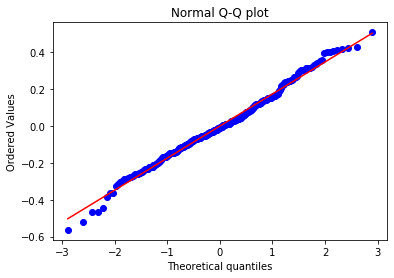

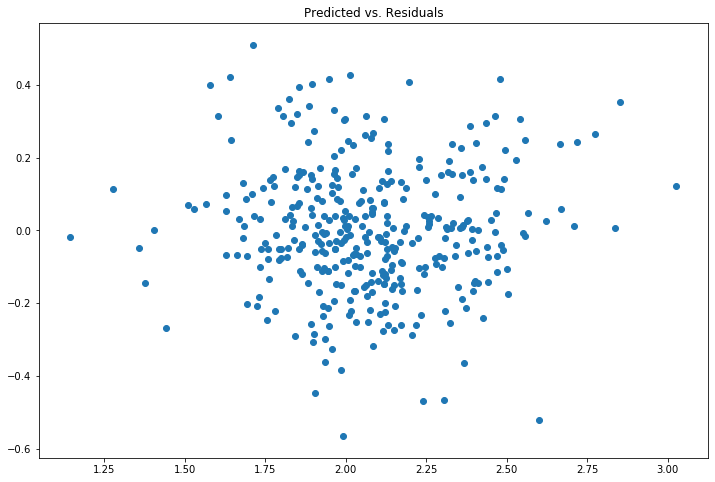

In [696]:
cross_val(X_train, y_train, model=LinearRegression, sm_summary=True, resid_plots=True)

In [ ]:
# Initial Reactions
    # seems fairly consistent (not crazy overfitted)
    # R2, mse, AIC all seem reasonably good
    # Decent first model
    # model def means something - F stat p-value is super low

# 5 assumptions

# linear and correctly specified -> PROBABLY FINE
# no serial correlation -> CHECK
    # DW between 1.5 nand 2.5 is the standard (mine is 1.8)
# no multicollinearity -> IT DIDN'T BREAK SO PROB OK-ISH
    # Condition number is huge tho (implying not very stable to changes in metrics)
# no heteroskedasticity -> SEEMS GOOD
    # visual plot of residuals looks fine
# normal errors -> SOME NON-NORMALCY BUT NOT A LOT
    # Omnibus measures normality -> null hyp is that it IS normal (no skew, no EXCESSIVE kurtosis)
        # Since p-value is 0.09, can't reject that it's normal at a 5% threshold
        # Omnnibus says I'm close to non-normalcy but fine
    # JB also tests normality (has same null hyp -> that is IS normal)
        # my p-value is just barely over 0.05 (so can't reject but clos)
        # would pref skew ~ 0 and kurtosis ~ 3 (mine are 0.07 and 3.5)
            # so prob have a little kurtosis but not blatantly bad (matches QQ graph)
    # Visually, seems like a little kurtosis

# Goodness of fit:
    # log-liklihood is positive (higher the better)
    # AIC/BIC both negative (lower the better)

# General Observations

# wrong sign for teacher_exp and bachelors_deg (multicollinearity?)
# avg_class_size has "wrong" sign (altho wouldn't be surprised if it was low coeff)
# a bunch of coefficients have high p-values (perhaps all the collinearity)
    # between mobility, low_inc, teacher ret, teacher bach, teacher attend

# Take Aways
# I think a linear regression is valid (assumptions basically hold)
# Seems like a reasonably good fit
# I suspect I have some multicollinearity going on (not surprising given the # of features and how inter-corr they are)
# Prob making coeff weird
    # Given that interpretability is big part of my goals, would like to try and improve MC
    
# Main Goals:
    # address possible MC
    # Consider dropping:
        # teacher attendence
        # student truancy
        # homeless
        # iep
        # bachelor
        # admin salary

## Address MC

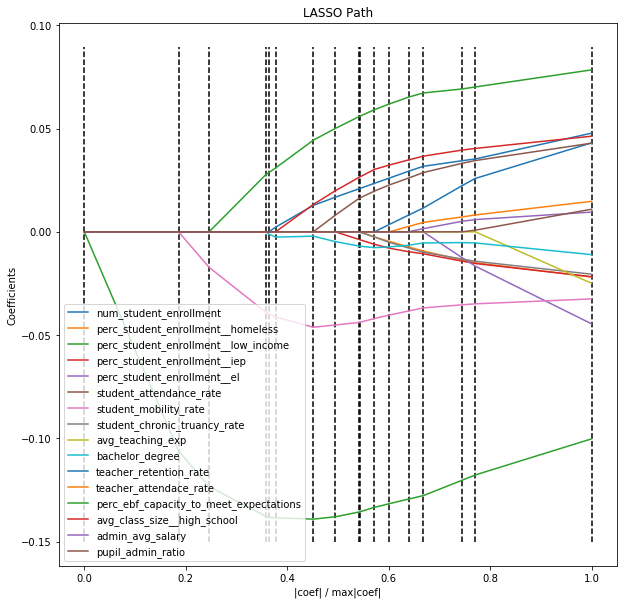

In [715]:
generate_LARS_plot(X_train, y_train)

In [ ]:
# list of features with low p-val with LARS rank:
        # teacher attendence (t-1)
        # student truancy (6)
        # homeless (t-1)
        # iep (t-1)
        # bachelor (4th to last) -> keep this one?
        # admin salary (t-first)
# Lasso also indicates remove teaching_exp
    # "wrong" sign
    # very small value
    # perhaps MC with other things?
        # visually reviewed correl heat maps
        # somewhat with teacher-retention (.42)
        # slightly negatively correl with lots of student demographics

## Remove LARS Features and Compare

### Remove Worst 6

In [213]:
lasso_columns_remove = [
        'perc_student_enrollment__homeless',
        'perc_student_enrollment__iep',
        'teacher_attendace_rate',
        'admin_avg_salary',
        'student_chronic_truancy_rate',
        'avg_teaching_exp'
    ]

In [613]:
# Prev best model
cross_val(X_train, y_train, model=LinearRegression)

R2 (in sample): 0.70806 +- 0.01117
R2: 0.65944 +- 0.04584
Mean Sq Error: 0.03417 +- 0.00715
AIC (in sample): -167.28770 +- 16.29629


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     80.94
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.74e-85
Time:                        18:03:17   Log-Likelihood:                 116.64
No. Observations:                 368   AIC:                            -211.3
Df Residuals:                     357   BIC:                            -168.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

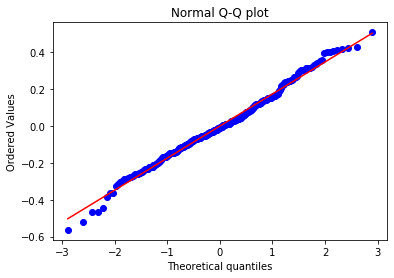

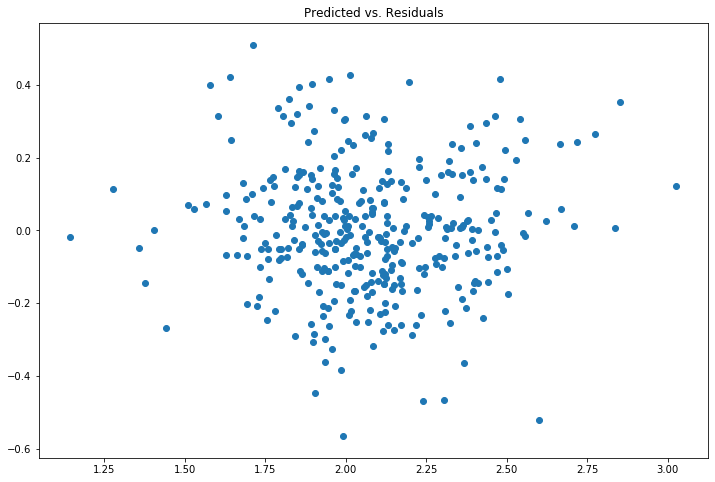

In [603]:
# Dropping LARS columns
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove, sm_summary=True, resid_plots=True)

In [604]:
# remarkably similar
    # slightly better metrics
    # slightly more variance
# prefer the simpler one with fewer features if they're basically identical
# stats profile and resids still look good
# A few of the variables are no statistically significant
# Condition number reduced by an order of magnitude
# Bachelor's degree still has "wrong" sign

### Remove Next Worst 4

In [609]:
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dropping Columns
R2 (in sample): 0.66048 +- 0.01181
R2: 0.62957 +- 0.04899
Mean Sq Error: 0.03716 +- 0.00781
AIC (in sample): -142.80741 +- 15.44450
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     115.9
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           5.02e-81
Time:                        18:09:08   Log-Likelihood:                 96.335
No. Observations:                 368   AIC:                            -178.7
Df Residuals:                     361   BIC:                            -151.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

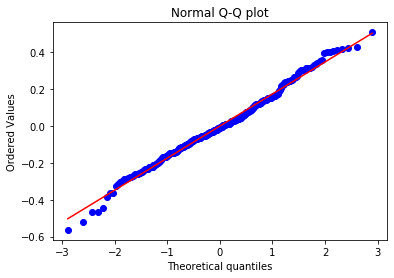

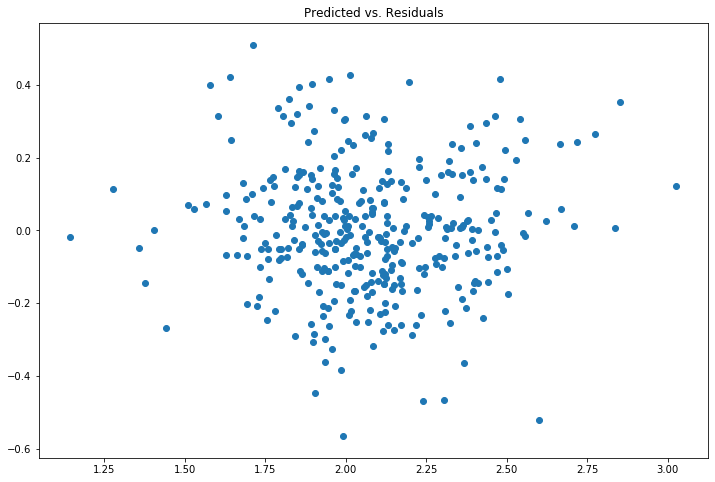

In [610]:
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove + [
    'num_student_enrollment',
    'student_attendance_rate',
    'teacher_retention_rate',
    'pupil_admin_ratio',
], sm_summary=True, resid_plots=True)

In [ ]:
# removing any of the above columns (the next 4 in LARS) makes the model a little worse

In [ ]:
# Bachelor and class size remain the "wrong" sign
    # altho bachelor is not sig so basically zero
# The condition number went down two orders of magnitude

**CONCLUSION**

Removing `lasso_columns_remove` definitely helped the model

Seems like remvoing additional individual metrics in addition doesn't hurt much

## EDA Again With Fewer Features

In [284]:
post_lasso_cols = list(set(for_model.columns) - set(lasso_columns_remove))

bachelor_degree  teacher_retention_rate  num_student_enrollment  \
count       461.000000              461.000000              461.000000   
mean         50.388937               86.826681             2345.542299   
std          18.079820                6.470398             3950.032412   
min           5.200000               56.000000              124.000000   
10%          24.700000               78.700000              356.000000   
25%          37.700000               83.700000              545.000000   
50%          51.500000               88.200000             1010.000000   
75%          63.200000               91.500000             2253.000000   
90%          73.100000               93.400000             5693.000000   
max          88.900000               99.000000            38764.000000   

       perc_student_enrollment__low_income  student_attendance_rate  \
count                           461.000000               461.000000   
mean                             42.491757                94.095445   
std                              18.257985                 1.850993   
min                               2.100000                78.700000   
10%                              17.900000                92.300000   
25%                              29.600000                93.600000   
50%                              42.600000                94.500000   
75%                              53.800000                95.100000   
90%                              63.400000                95.700000   
max                              99.600000                98.200000   

       avg_sat_both  pupil_admin_ratio  \
count    461.000000         461.000000   
mean       2.075922         173.529067   
std        0.319787          53.515202   
min        1.125000          62.500000   
10%        1.695000         111.200000   
25%        1.873000         136.300000   
50%        2.049500         173.300000   
75%        2.269000         204.400000   
90%        2.477000         234.400000   
max        3.204500         597.000000   

       perc_ebf_capacity_to_meet_expectations  student_mobility_rate  \
count                              461.000000             461.000000   
mean                                74.126898               8.055965   
std                                 21.966172               3.618214   
min                                 47.000000               1.000000   
10%                                 56.800000               3.900000   
25%                                 60.700000               5.400000   
50%                                 67.700000               7.700000   
75%                                 78.800000              10.100000   
90%                                100.800000              12.400000   
max                                198.000000              28.600000   

       perc_student_enrollment__el  avg_class_size__high_school  
count                   461.000000                   461.000000  
mean                      2.500651                    16.626898  
std                       5.625831                     4.335853  
min                       0.000000                     5.000000  
10%                       0.000000                    11.000000  
25%                       0.000000                    14.000000  
50%                       0.000000                    17.000000  
75%                       2.300000                    20.000000  
90%                       7.700000                    22.000000  
max                      39.000000                    28.000000

<Figure size 2880x2880 with 0 Axes>

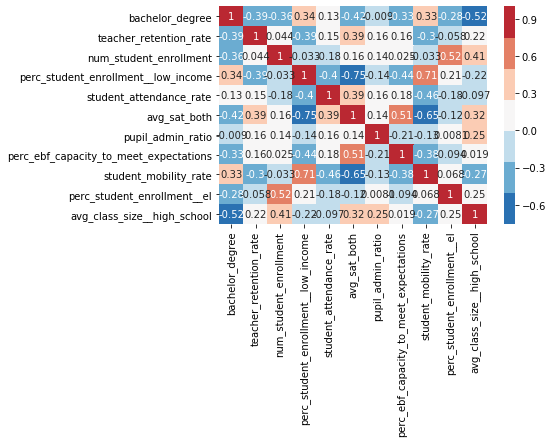

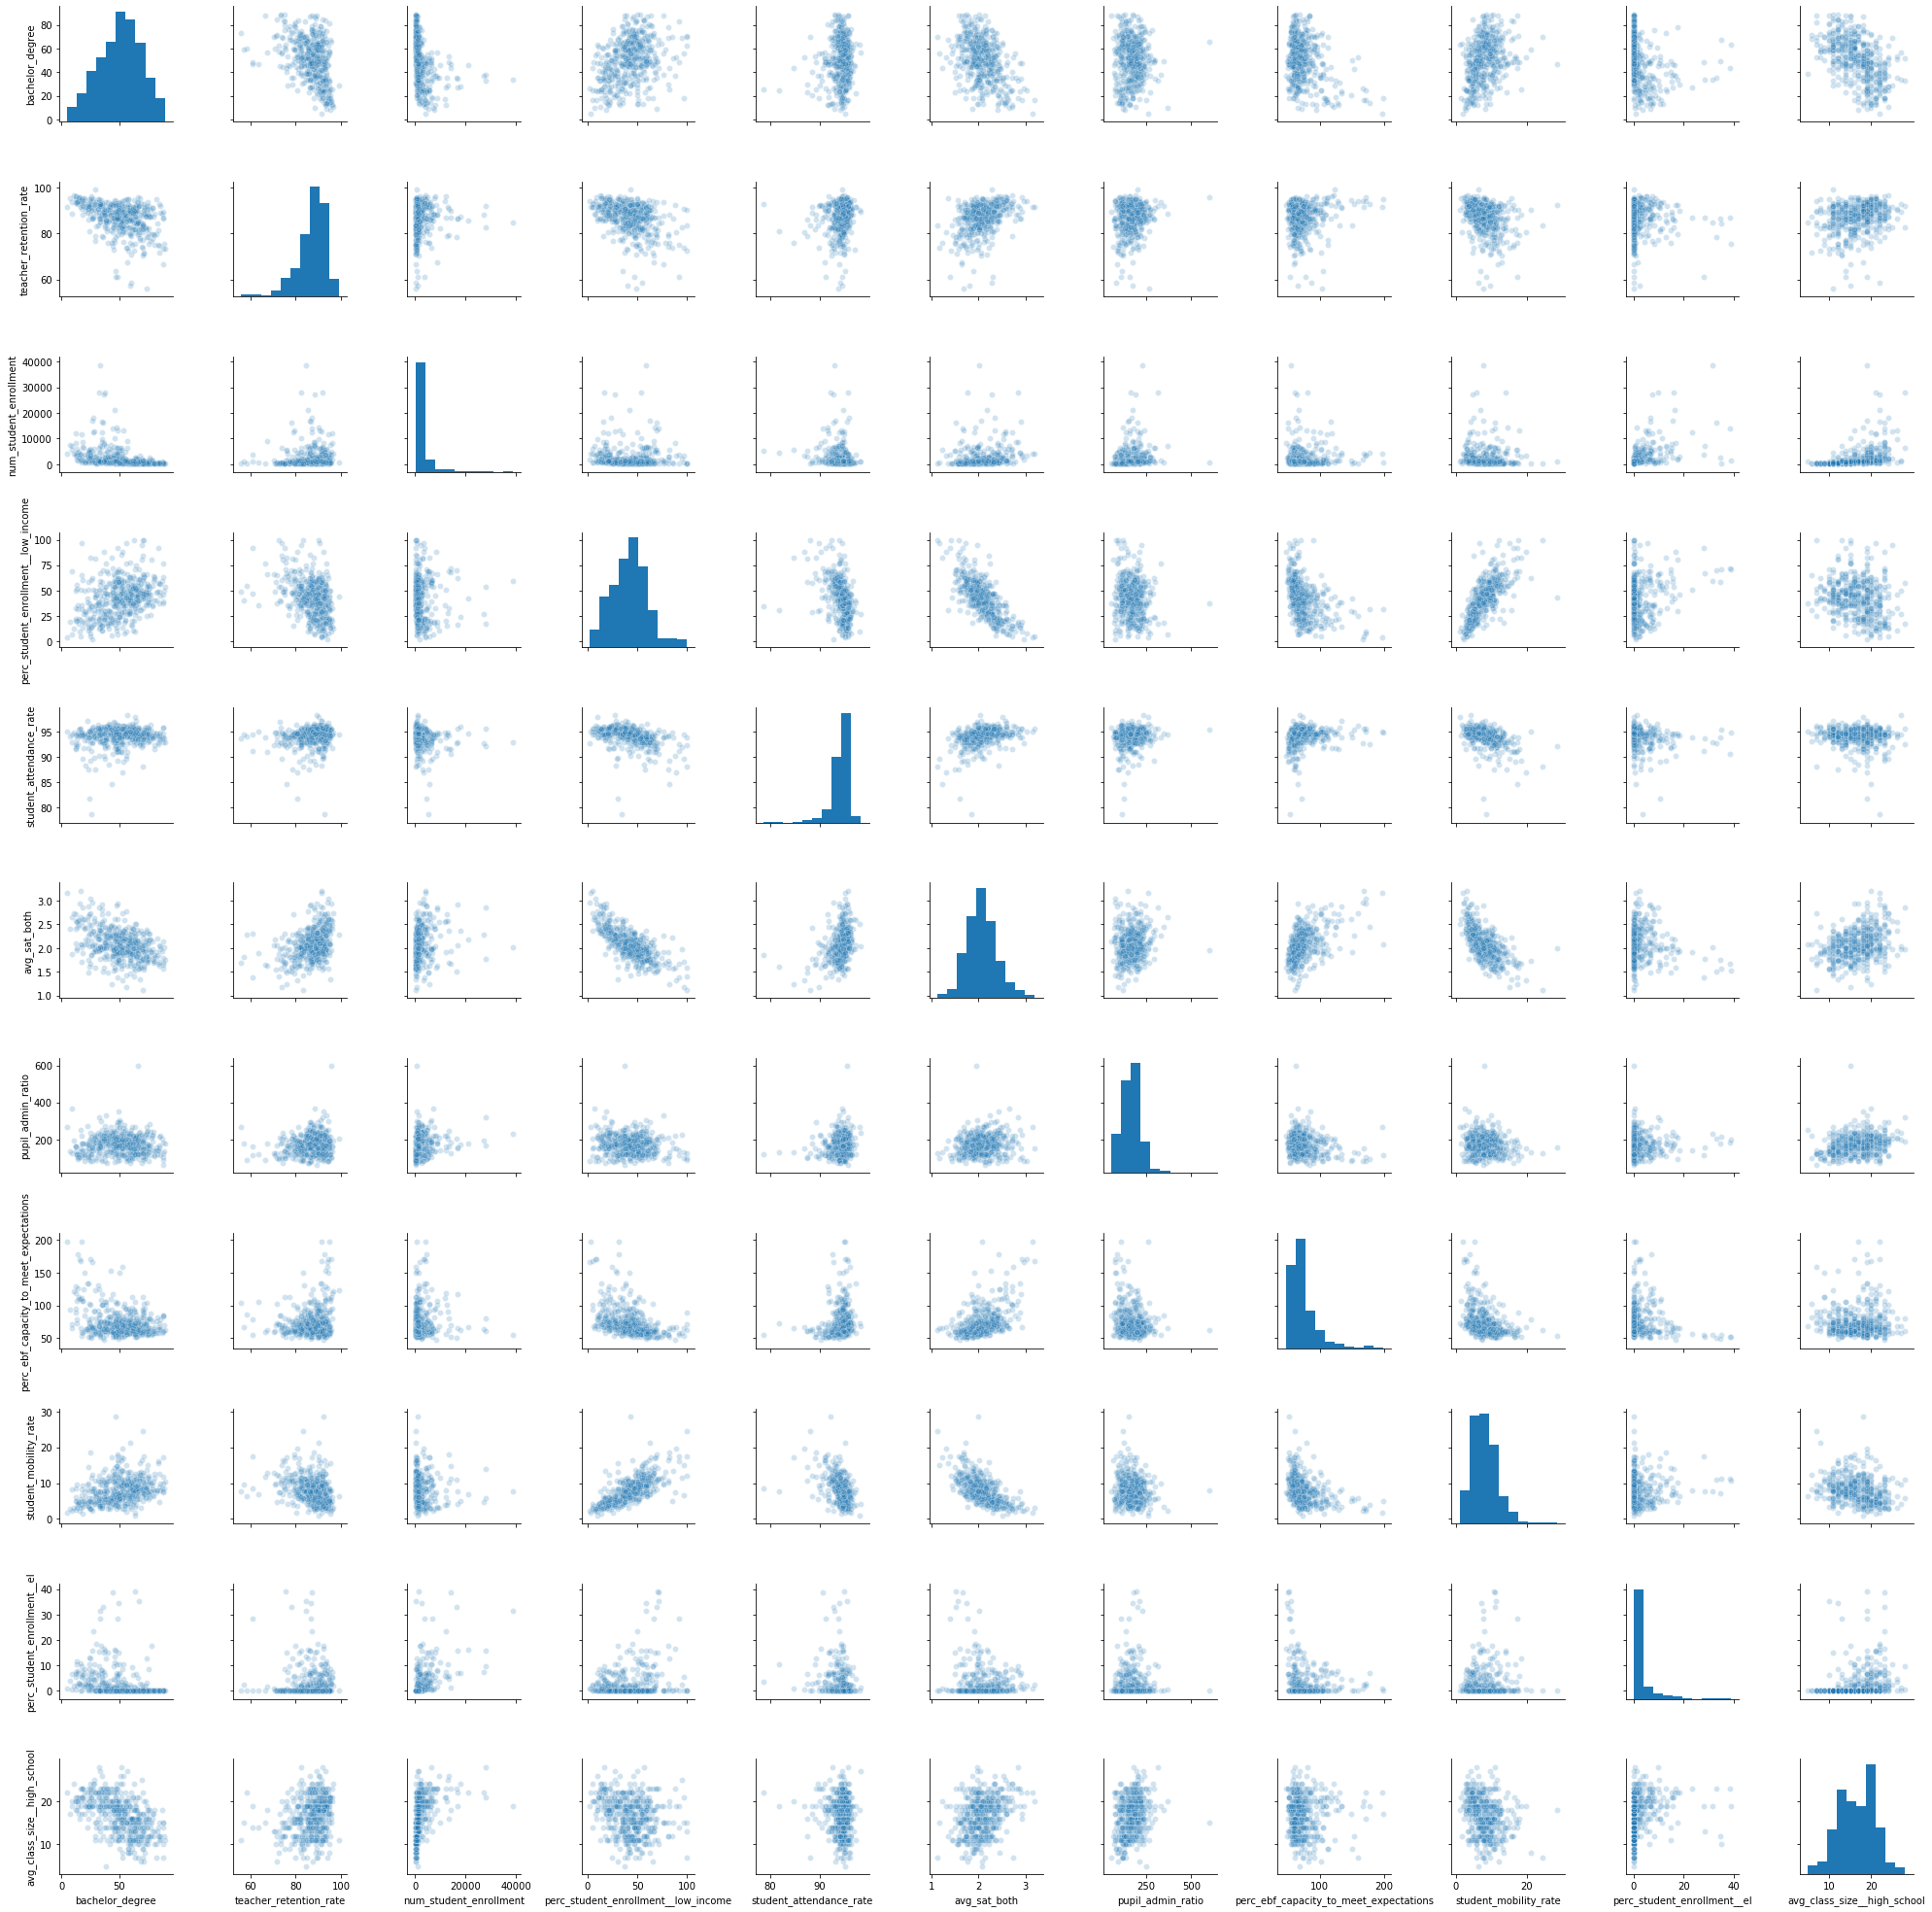

In [268]:
eda_column_subset(for_model, post_lasso_cols)

In [ ]:
# Possible Transformations:
    # log student enrollment, %_el, %_ebf
    # deg2 poly mobility, bachelor deg
# Makes sense that I have a high condition score
    # Heat map still pretty colored
# Mobility and low_income rates have a high correlation with each other (.7)
    # Nothing else much beyond .5

## Does Regularization Help?

### Ridge

In [619]:
for a in [x for x in range(10, 50)]:
    print(f'********** Alpha: {a} **********')
    cross_val(
        X_train,
        y_train,
        model=Ridge,
        alpha=a,
        standardize=True,
        drop_cols=lasso_columns_remove
    )

********** Alpha: 10 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69614 +- 0.01315
R2: 0.66540 +- 0.05599
Mean Sq Error: 0.03366 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 11 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69608 +- 0.01316
R2: 0.66549 +- 0.05583
Mean Sq Error: 0.03366 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 12 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69601 +- 0.01316
R2: 0.66557 +- 0.05568
Mean Sq Error: 0.03365 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 13 **********
Dropping Columns
Sta

Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69236 +- 0.01334
R2: 0.66577 +- 0.05116
Mean Sq Error: 0.03372 +- 0.00788
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 44 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69221 +- 0.01334
R2: 0.66573 +- 0.05102
Mean Sq Error: 0.03373 +- 0.00789
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 45 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69205 +- 0.01335
R2: 0.66568 +- 0.05088
Mean Sq Error: 0.03373 +- 0.00789
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 46 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFol

In [277]:
ridge_alpha = 23

In [622]:
# previous best model => no ridge
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [624]:
last_ridge = cross_val(
    X_train,
    y_train,
    model=Ridge,
    standardize=True,
    alpha=ridge_alpha,
    drop_cols=lasso_columns_remove
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69614 +- 0.01315
R2: 0.66540 +- 0.05599
Mean Sq Error: 0.03366 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


In [ ]:
# pretty damn similar

In [626]:
print_coef(columns=X_train.drop(columns=lasso_columns_remove).columns, coefs=last_ridge.coef_)

perc_student_enrollment__low_income: -0.14187287041086855
perc_ebf_capacity_to_meet_expectations: 0.06837413385725231
student_attendance_rate: 0.0446050611163689
num_student_enrollment: 0.040948477553812396
student_mobility_rate: -0.03570701649114222
avg_class_size__high_school: 0.03077527212198128
teacher_retention_rate: 0.023737934207512364
perc_student_enrollment__el: -0.018386758552565656
pupil_admin_ratio: 0.01832299510495499
bachelor_degree: -0.017824602109024645


In [292]:
# ^^^ relative importance of variables

### LASSO

In [629]:
for a in [x/2000 for x in range(0, 20)]:
    print(f'********** Alpha: {a} **********')
    cross_val(
        X_train,
        y_train,
        model=Lasso,
        standardize=True,
        alpha=a,
        drop_cols=lasso_columns_remove
    )

********** Alpha: 0.0 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.00000 +- 0.00000
R2: -0.00535 +- 0.00378
Mean Sq Error: 0.10162 +- 0.02222
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 0.0005 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69645 +- 0.01313
R2: 0.66428 +- 0.05671
Mean Sq Error: 0.03374 +- 0.00780
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 0.001 **********
Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69639 +- 0.01313
R2: 0.66438 +- 0.05589
Mean Sq Error: 0.03374 +- 0.00777
AIC (in sample): -167.88796 +- 17.02848
********** Alpha: 0.0015 **********
Droppin

In [630]:
lasso_alpha = 0.0015

In [632]:
# prev best
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [633]:
# with ridge
last_ridge = cross_val(
    X_train,
    y_train,
    model=Ridge,
    standardize=True,
    alpha=ridge_alpha,
    drop_cols=lasso_columns_remove
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69614 +- 0.01315
R2: 0.66540 +- 0.05599
Mean Sq Error: 0.03366 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


In [631]:
last_lasso = cross_val(
    X_train,
    y_train,
    model=Lasso,
    standardize=True,
    alpha=lasso_alpha,
    drop_cols=lasso_columns_remove
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.69630 +- 0.01313
R2: 0.66444 +- 0.05508
Mean Sq Error: 0.03373 +- 0.00774
AIC (in sample): -167.88796 +- 17.02848


In [634]:
# Ridge appears to be every so slightly better

In [635]:
print_coef(columns=X_train.drop(columns=lasso_columns_remove).columns, coefs=last_lasso.coef_)

perc_student_enrollment__low_income: -0.15179044914718343
perc_ebf_capacity_to_meet_expectations: 0.06818944701735205
student_attendance_rate: 0.04309048919519374
num_student_enrollment: 0.039648337845069895
avg_class_size__high_school: 0.031192916109015804
student_mobility_rate: -0.031131859686827804
teacher_retention_rate: 0.022484305915433943
pupil_admin_ratio: 0.016898634634454388
perc_student_enrollment__el: -0.014622533392572775
bachelor_degree: -0.014541038716088951


In [ ]:
# very similar to Ridge
    # top 4 are exactly the same
    # next two are just flip flopped order
        # wonder what a model with just those six would look like

**CONCLUSION**

Regularization was marginally better

Given focus on interprability, will refrain from regularization

## Super Sparse Model

In [636]:
top_six = [
    'perc_student_enrollment__low_income',
    'perc_ebf_capacity_to_meet_expectations',
    'student_attendance_rate',
    'num_student_enrollment',
    'avg_class_size__high_school',
    'student_mobility_rate'
]

In [638]:
top_six_complement = list(set(X_train.columns) - set(top_six))

In [639]:
cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [641]:
cross_val(X_train, y_train, model=LinearRegression, drop_cols=top_four_complement, sm_summary=True)

Dropping Columns
R2 (in sample): 0.67800 +- 0.01227
R2: 0.65099 +- 0.04866
Mean Sq Error: 0.03494 +- 0.00724
AIC (in sample): -158.44338 +- 14.94978
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           3.05e-85
Time:                        18:43:23   Log-Likelihood:                 106.29
No. Observations:                 368   AIC:                            -198.6
Df Residuals:                     361   BIC:                            -171.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [306]:
# Definitely a little worse

In [ ]:
# p values are nice
# still have a high condintion number
# nothing flipped sign

# Probably still like the old model

## Feature Engineering

### Polynomials

In [646]:
X_train_poly = X_train.copy()
X_train_poly['bachelor_sq'] = X_train_poly['bachelor_degree'] ** 2
X_train_poly['mobility_sq'] = X_train_poly['student_mobility_rate'] ** 2

In [647]:
X_train_poly.head()

num_student_enrollment  perc_student_enrollment__homeless  \
125                   612.0                                6.2   
301                  1628.0                                0.0   
259                   451.0                                0.0   
436                  1348.0                                0.0   
355                  6160.0                                1.3   

     perc_student_enrollment__low_income  perc_student_enrollment__iep  \
125                                 45.8                          17.8   
301                                  2.1                          13.8   
259                                 38.1                          13.3   
436                                 21.7                           9.9   
355                                 62.2                          20.0   

     perc_student_enrollment__el  student_attendance_rate  \
125                          0.0                     93.8   
301                          0.7                     92.8   
259                          0.0                     95.8   
436                          0.0                     94.2   
355                          3.1                     89.2   

     student_mobility_rate  student_chronic_truancy_rate  avg_teaching_exp  \
125                    6.3                           3.8              15.8   
301                    2.2                           0.6              14.8   
259                    7.4                           0.9              13.9   
436                    5.3                           5.0              16.1   
355                   11.9                          18.2              17.3   

     bachelor_degree  teacher_retention_rate  teacher_attendace_rate  \
125             51.1                    86.2                    66.7   
301             26.6                    93.8                    82.2   
259             74.2                    90.7                    88.8   
436             32.9                    95.0                    88.6   
355             48.2                    86.1                    60.8   

     perc_ebf_capacity_to_meet_expectations  avg_class_size__high_school  \
125                                    59.5                         26.0   
301                                   166.3                         19.0   
259                                    55.0                         18.0   
436                                    67.9                         18.0   
355                                    56.6                         23.0   

     admin_avg_salary  pupil_admin_ratio  bachelor_sq  mobility_sq  
125          84461.67              204.0      2611.21        39.69  
301         140118.31               83.5       707.56         4.84  
259         103990.00              214.8      5505.64        54.76  
436          95030.68              149.8      1082.41        28.09  
355         109074.78              293.3      2323.24       141.61

In [648]:
# top model so far
with_out_poly = cross_val(X_train, y_train, model=LinearRegression, drop_cols=lasso_columns_remove)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


In [653]:
with_poly = cross_val(
    X_train_poly,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove,
    sm_summary=True
)

Dropping Columns
R2 (in sample): 0.70025 +- 0.01292
R2: 0.66455 +- 0.05484
Mean Sq Error: 0.03362 +- 0.00742
AIC (in sample): -167.58099 +- 16.55010
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     68.21
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.80e-84
Time:                        18:48:21   Log-Likelihood:                 118.80
No. Observations:                 368   AIC:                            -211.6
Df Residuals:                     355   BIC:                            -160.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
# Slight better but poly features aren't sig and AIC got worse

# NO poly transforms

### Log Transforms

In [663]:
X_train_log = X_train.copy()
X_train_log['num_student_enrollment'] = np.log(X_train['num_student_enrollment'])
# X_train_log['perc_student_enrollment__el'] = np.log(X_train['perc_student_enrollment__el'])
# X_train_log['perc_ebf_capacity_to_meet_expectations'] = np.log(X_train['perc_ebf_capacity_to_meet_expectations'])

In [664]:
# top model
cross_val(
    X_train,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove
)

Dropping Columns
R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [666]:
cross_val(
    X_train_log,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove,
    sm_summary=True
)

Dropping Columns
R2 (in sample): 0.71442 +- 0.00758
R2: 0.68329 +- 0.03724
Mean Sq Error: 0.03204 +- 0.00744
AIC (in sample): -185.66024 +- 17.26505
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     88.09
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.67e-90
Time:                        18:56:27   Log-Likelihood:                 127.59
No. Observations:                 368   AIC:                            -233.2
Df Residuals:                     357   BIC:                            -190.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [656]:
# Log transform of enrollment makes every metric better
# Stats model outputs look good 

# New top model

### Interaction Terms

In [667]:
X_train_interaction = X_train_log.copy()
X_train_interaction['low_inc_x_ebf'] = X_train_interaction['perc_student_enrollment__low_income'] * X_train_interaction['perc_ebf_capacity_to_meet_expectations']
# X_train_interaction['enroll_/_pupil_admin'] = X_train_interaction['num_student_enrollment'] / X_train_interaction['pupil_admin_ratio']
# X_train_interaction['class_x_bach'] = X_train_interaction['bachelor_degree'] * X_train_interaction['avg_class_size__high_school']

In [668]:
# top model
cross_val(
    X_train_log,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove
)

Dropping Columns
R2 (in sample): 0.71442 +- 0.00758
R2: 0.68329 +- 0.03724
Mean Sq Error: 0.03204 +- 0.00744
AIC (in sample): -185.66024 +- 17.26505


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [669]:
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove,
    sm_summary=True
)

Dropping Columns
R2 (in sample): 0.72664 +- 0.00595
R2: 0.69527 +- 0.02796
Mean Sq Error: 0.03073 +- 0.00654
AIC (in sample): -196.50145 +- 16.18173
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     84.86
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           2.06e-92
Time:                        18:57:27   Log-Likelihood:                 135.62
No. Observations:                 368   AIC:                            -247.2
Df Residuals:                     356   BIC:                            -200.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [425]:
# Adding low_inc * ebf interaction term made every single metric improve
    # also got improvements from other interactions but not much
        # but improvement low
        # lost normalcy of errors

# Take ONLY low_inc * ebf

# a bunch of stuff became non-significant
    # what happens if we drop those


In [670]:
drop_after_interaction = [
    'perc_student_enrollment__low_income',
    'bachelor_degree',
    'avg_class_size__high_school',
    'pupil_admin_ratio'
]

In [671]:
# top model
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove,
)

Dropping Columns
R2 (in sample): 0.72664 +- 0.00595
R2: 0.69527 +- 0.02796
Mean Sq Error: 0.03073 +- 0.00654
AIC (in sample): -196.50145 +- 16.18173


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dropping Columns
R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.27e-96
Time:                        19:02:55   Log-Likelihood:                 134.52
No. Observations:                 368   AIC:                            -253.0
Df Residuals:                     360   BIC:                            -221.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

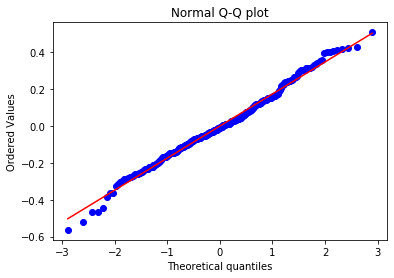

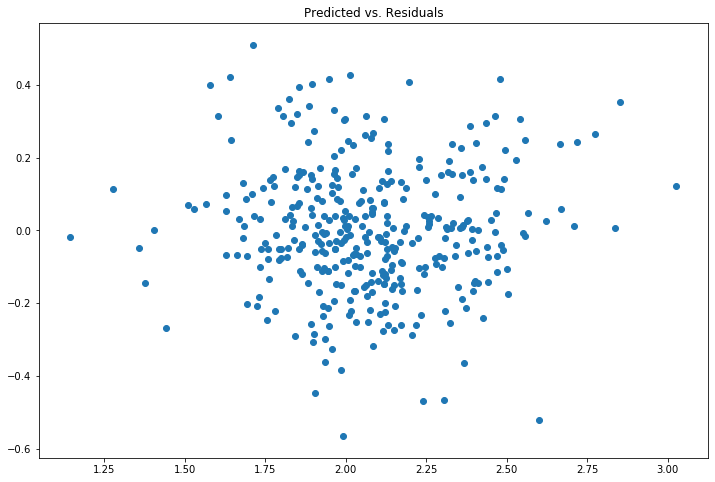

In [674]:
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove + drop_after_interaction,
    sm_summary=True,
    resid_plots=True
)

In [ ]:
# Removing non-significant features made every metric better

In [431]:
# Barely normal according to metrics
# Trade-offs: Transformations made...
    # Errors less normal
    # Improved fit and accuracy
    # Reduced cross validation variance
    # Became a little less interpretable
    
# Normalcy still looks ok-ish upon visual inspection

# DROP the non-sig columns

## Assess Assumptions of Preferred Model

### Standard Checks

                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.27e-96
Time:                        19:07:48   Log-Likelihood:                 134.52
No. Observations:                 368   AIC:                            -253.0
Df Residuals:                     360   BIC:                            -221.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

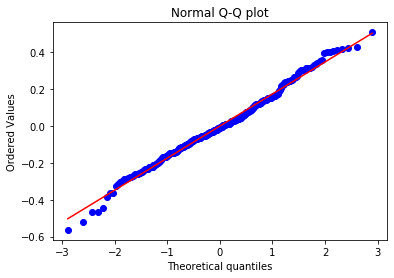

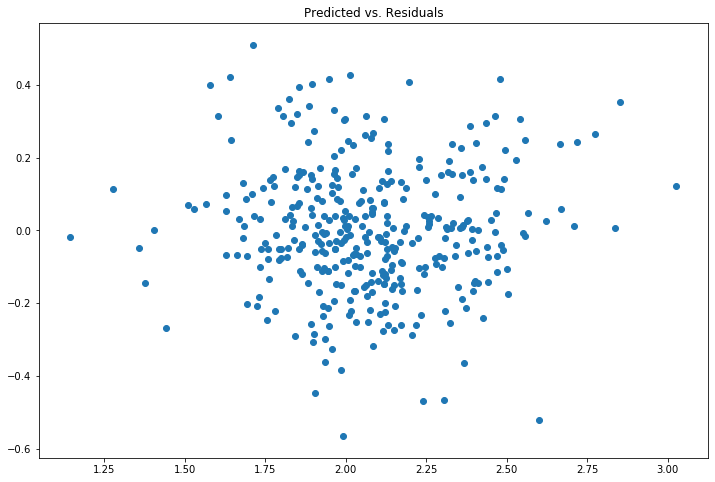

In [677]:
fit_final = run_stats_models(
    X_train_interaction.drop(columns=lasso_columns_remove + drop_after_interaction),
    y_train
)

cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove + drop_after_interaction,
    sm_summary=True,
    resid_plots=True
)

In [682]:
# a little non-normalcy but seems ok
# Condition Number still really high

### Test for Endogeneity

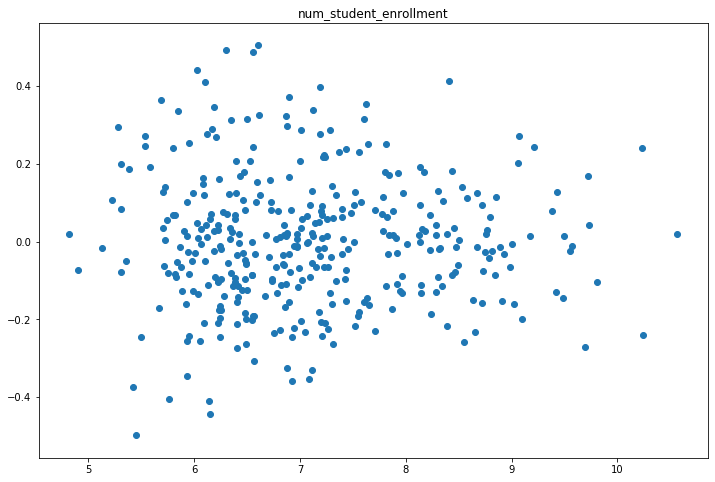

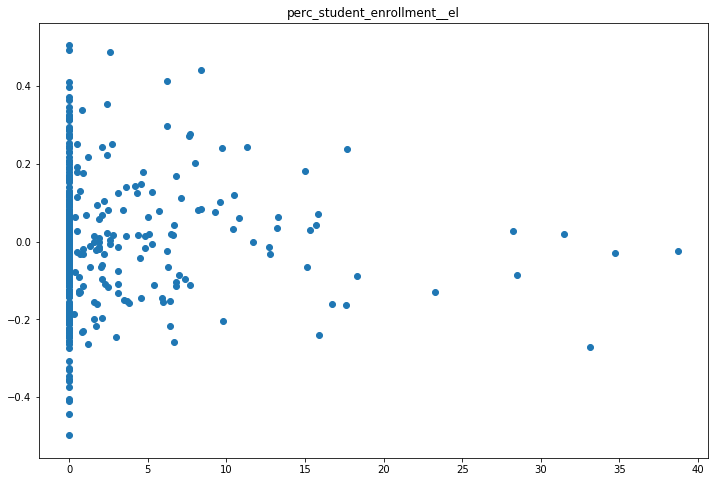

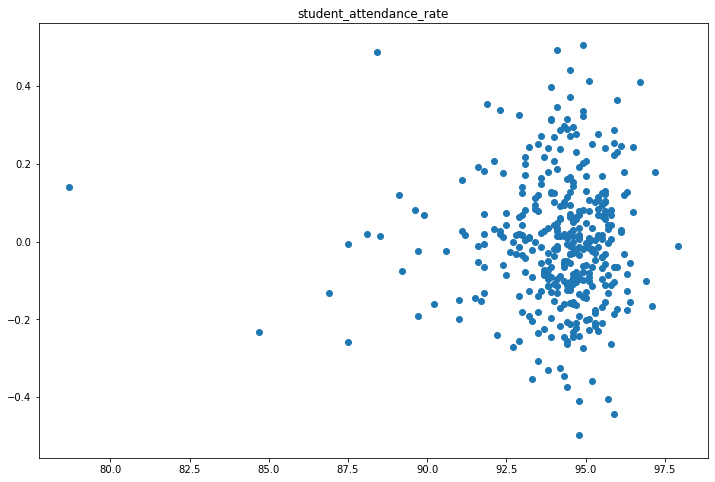

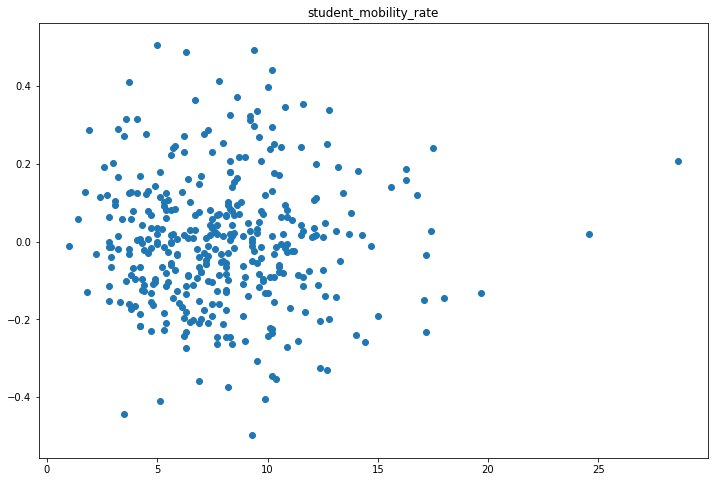

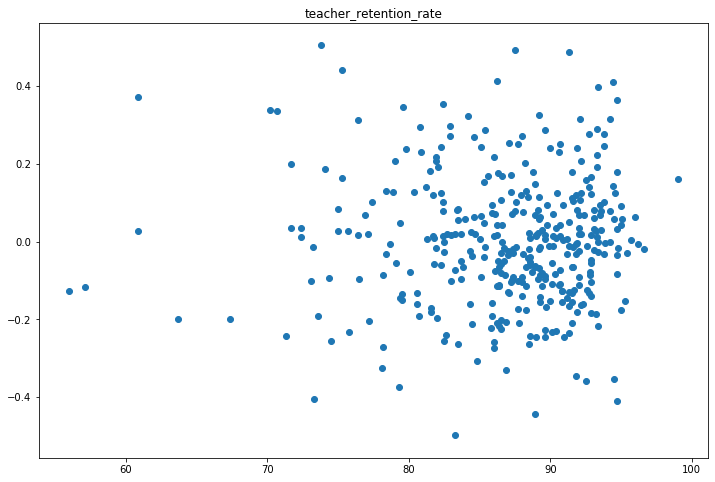

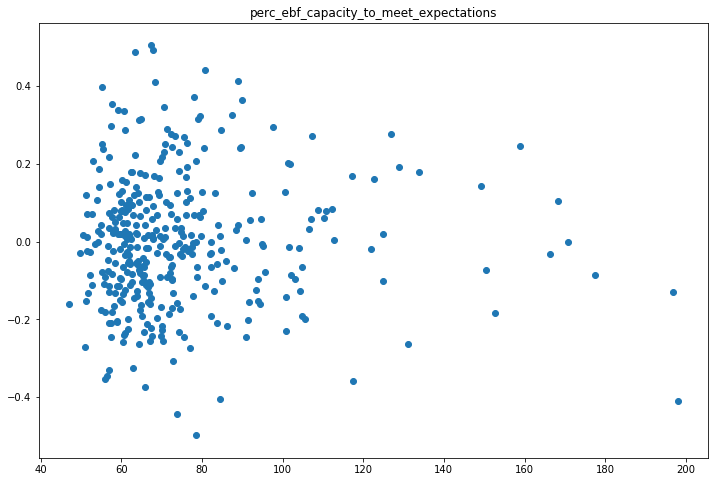

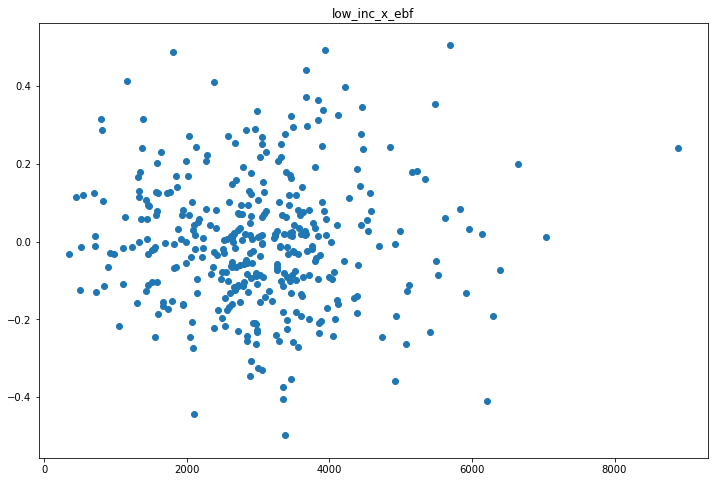

In [678]:
final_features = X_train_interaction.drop(columns=lasso_columns_remove + drop_after_interaction).columns

for col in final_features:
    plt.figure(figsize=(12,8))
    plt.scatter(X_train_interaction[col], fit_final.resid)
    plt.title(col)

In [679]:
final_features = X_train_interaction.drop(columns=lasso_columns_remove + drop_after_interaction)

In [680]:
final_features['resid'] = fit_final.resid

In [681]:
final_features.corr()['resid']

num_student_enrollment                   -2.429716e-15
perc_student_enrollment__el              -6.337131e-17
student_attendance_rate                   8.500851e-15
student_mobility_rate                     1.546781e-15
teacher_retention_rate                    3.905149e-17
perc_ebf_capacity_to_meet_expectations    1.538120e-15
low_inc_x_ebf                             2.274490e-14
resid                                     1.000000e+00
Name: resid, dtype: float64

In [448]:
# looks like all the corrlations between features and residuals are extremely low

## Invstigate Standardization of Final Model

In [683]:
# top model
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    drop_cols=lasso_columns_remove + drop_after_interaction,
)

Dropping Columns
R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084
Standardizing
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.27e-96
Time:                        19:11:22   Log-Likelihood:                 134.52
No. Observations:                 368   AIC:                            -253.0
Df Residuals:                     360   BIC:                            -221.8
Df Model:                           7                                 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

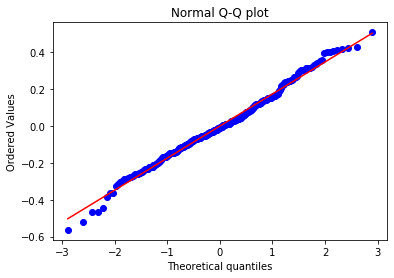

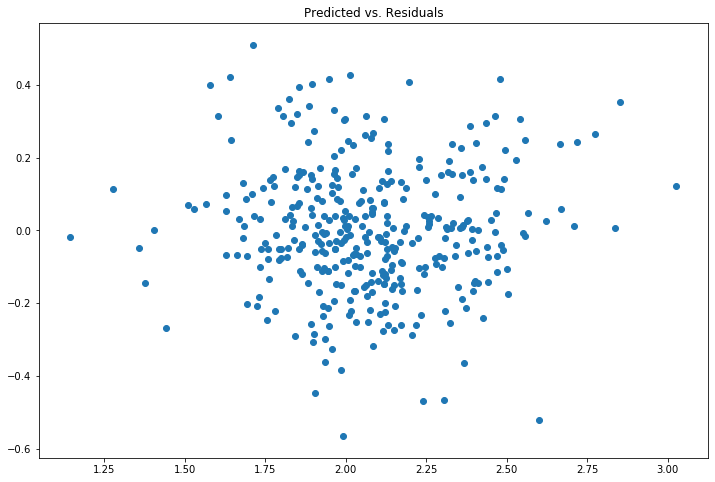

In [684]:
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    standardize=True,
    drop_cols=lasso_columns_remove + drop_after_interaction,
    sm_summary=True,
    resid_plots=True
)

In [ ]:
# answer matches stats model pretty closesly
# CONDITION NUMBER tanked (that's a good thing) -> perhaps this is the best model?

In [ ]:
# Relative importance of differnt features
    # Tier 1
        # % EBF
        # % EBF x low-income
    # Tier 2
        # student enrollment (logged)
    # Tier 3
        # student attendence rate
    # Tier 4
        # student mobility
        # % english learning
    # Tier 5
        # teacher retention

### Check Regularization Techniques

In [685]:
# top model
cross_val(
    X_train_interaction,
    y_train,
    model=LinearRegression,
    standardize=True,
    drop_cols=lasso_columns_remove + drop_after_interaction,
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [688]:
# Ridge
cross_val(
    X_train_interaction,
    y_train,
    model=Ridge,
    standardize=True,
    alpha=ridge_alpha,
    drop_cols=lasso_columns_remove + drop_after_interaction,
    sm_summary=True
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.72355 +- 0.00517
R2: 0.70102 +- 0.02391
Mean Sq Error: 0.03017 +- 0.00647
AIC (in sample): -201.89487 +- 15.74084
Standardizing
                            OLS Regression Results                            
Dep. Variable:           avg_sat_both   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.27e-96
Time:                        19:14:48   Log-Likelihood:                 134.52
No. Observations:                 368   AIC:                            -253.0
Df Residuals:                     360   BIC:                            -221.8
Df Model:                           7                                 

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [687]:
# Lasso
cross_val(
    X_train_interaction,
    y_train,
    model=Lasso,
    standardize=True,
    alpha=lasso_alpha,
    drop_cols=lasso_columns_remove + drop_after_interaction,
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.72409 +- 0.00510
R2: 0.70076 +- 0.02326
Mean Sq Error: 0.03018 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084


Lasso(alpha=0.0015, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [690]:
# Ridge is slightly better
# If going to standardize anyway, might as well

# TD: re-find optimal alpha
# TD: check elastic net

## Consider if different null handling would change results

### Perc English Learner -> filled lots of n/a values. What if we removed it?

In [691]:
# top model
cross_val(
    X_train_interaction,
    y_train,
    model=Ridge,
    standardize=True,
    alpha=ridge_alpha,
    drop_cols=lasso_columns_remove + drop_after_interaction,
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.72355 +- 0.00517
R2: 0.70102 +- 0.02391
Mean Sq Error: 0.03017 +- 0.00647
AIC (in sample): -201.89487 +- 15.74084


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [692]:
cross_val(
    X_train_interaction,
    y_train,
    model=Ridge,
    standardize=True,
    alpha=ridge_alpha,
    drop_cols=lasso_columns_remove + drop_after_interaction + ['perc_student_enrollment__el'],
)

Dropping Columns
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
Standardizing within KFold
R2 (in sample): 0.71460 +- 0.00530
R2: 0.69265 +- 0.02432
Mean Sq Error: 0.03099 +- 0.00652
AIC (in sample): -194.50412 +- 15.39634


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Definitely got worse
    # How valid is the assumption that they are zero?

In [689]:
final_df[final_df.perc_student_enrollment__el < 1].sample(30)

num_student_enrollment  perc_student_enrollment__el  \
382                6.475433                          0.0   
412                6.335054                          0.0   
246                6.104793                          0.0   
443                6.810142                          0.0   
341                8.239065                          0.3   
325                6.186209                          0.0   
141                6.545350                          0.0   
276                6.204558                          0.0   
403                8.141190                          0.6   
378                6.858565                          0.0   
7                  5.707110                          0.0   
434                6.220590                          0.0   
39                 6.447306                          0.0   
83                 6.236370                          0.0   
362                5.356586                          0.0   
154                5.533389                          0.0   
197                7.480428                          0.0   
428                6.890609                          0.0   
103                6.391917                          0.0   
155                5.308268                          0.0   
453                5.983936                          0.0   
435                6.896694                          0.0   
331                7.841493                          0.0   
315                6.871091                          0.0   
240                5.880533                          0.0   
191                6.066108                          0.0   
133                6.811244                          0.0   
153                6.478510                          0.0   
89                 5.796058                          0.0   
123                7.192934                          0.0   

     student_attendance_rate  student_mobility_rate  teacher_retention_rate  \
382                     95.3                    7.2                    92.9   
412                     94.1                    4.7                    71.7   
246                     93.8                   13.3                    86.3   
443                     95.1                    5.3                    89.6   
341                     95.9                    4.2                    93.2   
325                     95.2                   11.2                    84.3   
141                     95.7                    6.4                    89.3   
276                     94.0                    9.6                    84.6   
403                     86.9                   19.7                    80.6   
378                     95.5                    6.1                    89.7   
7                       94.8                    7.5                    72.4   
434                     96.1                    6.5                    93.6   
39                      94.4                    8.1                    91.7   
83                      94.4                    6.4                    99.0   
362                     94.3                    9.3                    86.7   
154                     93.6                    6.2                    82.9   
197                     92.5                   13.8                    85.9   
428                     95.6                    3.7                    91.8   
103                     94.0                    9.7                    79.0   
155                     94.9                    7.0                    88.7   
453                     93.0                   13.4                    82.3   
435                     94.5                    3.2                    92.9   
331                     94.8                    6.2                    89.0   
315                     94.2                    8.4                    81.7   
240                     96.3                    5.9                    90.8   
191                     91.8                   10.9                    91.8   
133        

In [505]:
# manually collected data from website on ~10% of the districts with NA for perc_student_enrollment__el
# e.g. https://www.illinoisreportcard.com/District.aspx?source=studentcharacteristics&source2=lep&Districtid=24032024C04

ten_perc_sample = [
0.1,
2.4,
0.6,
0.1,
0,
0.8,
0.1,
0.1,
0.1,
0.4,
0.2,
0,
0,
0,
0.2,
0,
0,
0.4,
0,
0.2,
0,
0,
0,
0,
0,
0,
0.3,
0,
0.2,
0
]

In [506]:
np.mean(ten_perc_sample)

0.20666666666666667

In [507]:
np.std(ten_perc_sample)

0.45087569117095777

In [ ]:
# Seems like 0 is a defensible null handling strategy given sample

# Final Model Comparisons

In [512]:
# baseline
k_folds_removed_features(X_train, y_train, cols_remove=lasso_columns_remove)

R2 (in sample): 0.69647 +- 0.01313
R2: 0.66414 +- 0.05753
Mean Sq Error: 0.03375 +- 0.00783
AIC (in sample): -167.88796 +- 17.02848


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [510]:
# super sparse -> dropped 4 features
k_folds_removed_features(X_train, y_train, cols_remove=top_four_complement)

R2 (in sample): 0.67800 +- 0.01227
R2: 0.65099 +- 0.04866
Mean Sq Error: 0.03494 +- 0.00724
AIC (in sample): -158.44338 +- 14.94978


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [509]:
# with interaction terms -> seven (logged enrollment, added interaction term, swapped teach_ret in for avg_class_size)
k_folds_removed_features(X_train_interaction, y_train, cols_remove=lasso_columns_remove + drop_after_interaction)

R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [508]:
# with standardized features
k_folds_vanilla_linear(std_df, y_train)

R2 (in sample): 0.72423 +- 0.00510
R2: 0.70063 +- 0.02372
Mean Sq Error: 0.03019 +- 0.00639
AIC (in sample): -201.89487 +- 15.74084


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# but condition # went from 2.2*10^5 to 2.94

# After talk with John

In [ ]:
# does adding in outliers affect model (chicago, homeless one)
# worth checking ridge, lasso, elastic net
# does imputing teacher attendence and not dropping those rows affect model